# Feature Engineering 

>Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine" learning is basically feature engineering. @Andrew Ng

Общая схема классического машинного обучения выглядит так. Даже в случае нейросетей некая предобработка исходных данных все равно не бывает лишней

![alttext](https://miro.medium.com/max/1400/1*2T5rbjOBGVFdSvtlhCqlNg.png)

## Генерация признаков

> Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. @Dr. Jason Brownlee

**Генерация признаков** - процесс придумывания способов описания данных с помощью простых значений, которые должны отражать характеристики объектов исследований, через которые выражаться целевые значения 






Изначально объекты в нашем датасете могут быть представлены в виде описаний, которые не являются признаковыми, либо, очевидно, требует некоторой предобработки:

1. веб-страницы 
2. файлы 
3. ссылки на участников группы
4. измерения в разных единицах (см, м, дц)
и т.д 

Большая часть моделей неспособна работать с такими представлениями в сыром виде и или просто не запустится, либо будет выдавать неадекватные результаты

Процесс создания признаков зависит от модели, которую мы собираемся использовать. Для одних моделей полезно добавить признаки, полученные делением/перемножением исходных. Другие модели могут провести эти операции сами и экономнее/менее переобучаясь. Как вариант, добавление признаков, явно зависящих от друг друга может даже мешать некоторым моделям. 


Например, плохая идея добавлять в обычную линейную модель как признаки X1 и X2, так и их сумму. 

![alttext](https://kodomo.fbb.msu.ru/FBB/year_20/ml/fe_is_be.png)

Вообще говоря, надо понимать, что процесс feature engneering является критическим местом, bottleneck, в машинном обучении. Все, что ваша модель будет знать о данных решается на этом этапе. Больше, чем вы ей дадите - она не узнает. 

Если вы ей в данных дадите явную подсказку об ответе - то она будет использовать эту подсказку, а реальные закономерности может и не выучить. К примеру, можно дать ей в качестве признака id покупателя, который каждую неделю покупает одно и то же. Если таких ситуаций будет много, то она и выучит, что надо предсказывать все по id. Когда же к вам придет новый покупатель или у старого что-то поменяется в поведении, модель начнет вести себя неадекватно. 

Точно такую же роль может сыграть информация о номере эксперимента, лаборатории, в которой его проводили, аспиранте, который его проводил и тд. 

Такая ситуация будет называться **data leakage**.


Ну и понятно, что если вы дадите модели только нерелевантную информацию, она ничего из нее не вытащит. 

> At the end of the day, some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used. @ Prof. Pedro Domingos

> The algorithms we used are very standard for Kagglers. …We spent most of our efforts in feature engineering. … We were also very careful to discard features likely to expose us to the risk of over-fitting our model.  @Xavier Conort, топ-участник Kaggle



## Типы признаков 

Традиционно признаки делятся на 




### Вещественные 
Вещественные признаки бывают:
 * дискретные. Например - число лайков от пользователей

![alttext](https://www.influencive.com/wp-content/uploads/2021/02/Instagram-Likes-515.png)


 * непрерывные. Например - температура

 ![alttext](https://www.hexoral.ru/sites/hexoral_ru/files/temperatura_71551222-min.jpg)


Понятно, что разделение часто условное. Тот же возраст можно посчитать и дискретной переменной (пользователь всегда нам сообщает свои полные года), и непрерывной (возраст можно считать с любой точностью, но никто не будет) )


Также иногда вещественные признаки делят на относительные (считаются относительно чего-то, уже нормированные и тд)  и интервальные. 


### Категориальные 



Значение -  принадлежность к какой-то из категорий. Традиционно делятся на сильно отличающиеся по свойствам:
 * упорядоченные (ординальные) - для каждой пары возможных категорий можем сказать, какая больше, а какая меньше. Например - класс места. Или размер одежды


![alttext](https://miro.medium.com/max/1384/1*ychLO4DAe5cvD1UwUuvjZw.png)
 
 * неупорядоченные (номинальные) - категории между собой несравнимы. Обычно нельзя сказать, что красный телефон больше синего. Или что солнечная погода больше снежной


![alttext](https://miro.medium.com/max/1400/0*iKsDex5fUBQoYTju.png)

Часто мы сталкиваемся с бинарными категориальными признаками - для которых известно только две возможных категории (например, биологический пол человека). 



## Преобразования 



### Вещественных признаков 



#### Бинаризация 

Например, нам может быть не интересно, сколько конкретно раз встретилось явление в наблюдении - главное, что оно вообще встретилось. Тогда мы просто превращаем наш вещественный признак в бинарный "было ли явление", и работаем уже с ним. 



#### Округление

Часто данные до нас доходят с очень высокой точностью после запятой. Нужно ли это нашей модели - часто нет. Иногда по факту два наблюдения не различаются  по этому признаку (разница в пределах статошибки), но по признаку их отличить можно. Это может приводить к переобучению. В таких случаях разумно признаки округлить. 

#### Bining (Бинирование)

Опять же, нам не интересны точные значения - например, что видео набрало 1000 лайков, а не 1001. 

К тому же, число просмотров/лайков некоторых видео может быть очень большим в сравнении с остальными, что будет приводить к неадекватному поведению. 
В итоге часть значений у нас встречается часто, а часть - очень редко. Это может приводить к неадекватному поведению модели. 




##### Fixed-width bining

Просто бьем наши значения по диапазонам фиксированной длины. Так часто поступают с возрастом. 

![alttext](https://miro.medium.com/max/832/1*R6ajYFdrsCZ6b3CVj_ZH4Q.png)



##### Adaptive Binning

Это не всегда работает хорошо. Например, распределение зарплат у нас очень сильно скошено вправо. 

![alttext](https://miro.medium.com/max/818/1*ZICx_7zQc_QefDORO4HXKA.png)

И бинирование с фиксированной длиной бина нам не поможет справиться с редкими значениями.

В этой ситуации помогает бинирование, например, по квантилям - когда границы бина представляют собой квантили. 

![alttext](https://miro.medium.com/max/798/1*SFKE_AVc2SZEeV5xPanAXg.png)

#### Логарифмирование

С ситуацией, когда распределено скошено вправо работает и другой подход - прологаримфировать величину. 

![alttext](https://miro.medium.com/max/806/1*NV2JXvMfqfVQwUPUkh0Y9A.png)

Обобщением этгго подхода явлется [Box-Cox Transform](https://www.statisticshowto.com/box-cox-transformation/#:~:text=A%20Box%20Cox%20transformation%20is,a%20broader%20number%20of%20tests.), общей целью которой является придать данным вид более похожий на нормальнео распределение, с которым работает бОльшее число моделей и сходимость лучше 


### Категориальных признаков 

#### Label encoding 

Просто берем и каждой категории однозначно сопоставляем число. 
Очень простой способ, если признак ординальный - будет работать почти всегда. 

Если же наш признак - номинальный, то могут возникнуть проблемы. Мы не можем сказать, что салатовый больше красного (в большинстве случаев). Но модель ничего про это не знает и после нашего кодирования спокойно такие сравнения может производить. Это может приводить к более низкому качеству модели и выучиванию ею неправильной информации. Кроме того, например, деревьям решений , чтобы выделить в таком случае конкретную категорию придется делать сразу несколько действий, которые, в силу жадности алгоритма их построения, могут и не быть найдены



 Некоторые модели (например, lightgbm) чами автоматически могут перекодировать все праавильно, если им сообщить, что переданный признак - категориальный. Для некоторых это придется делать вручную. 

#### One-hot encoding 

Схемой, которая часто используется на практике, является one-hot encoding. Он состоит том, что вместо одного категориального признака X создается набор бинарных категориальных признаков, которые отвечают на вопрос "X == C? ", где C пробегает все возможные значения категориального признака. 

Теперь чтобы обусловиться на конкретное значение категориального признака, дереву решений достаточно задать один вопрос. 

![alttext](https://russianblogs.com/images/855/ddd65f4f342886bb411d41a33c5528e7.png)


Однако у такой схемы есть один минус - мы получаем линейно зависимые признаки. Это может плохо влиять на некоторые модели (для случая нейронных сетей - обычно нет, но полезно держать в голове). 


![alttext](https://miro.medium.com/max/1903/1*9VU1fPokjaMjohu0qDMVtQ.png)

Потому иногда одну из категорий исключают при кодировании, например, в примере выше можно исключить Fish, ведь если все три других признака-категории равны 0, то точно верно, что категория - Fish. 



#### Target encoding 

Кодируем каждую категорию каким-то численным параметром, характеризующим то, что мы предсказываем. Например, можно каждую категорию категориального признака заменять на среднее 

На самом деле, так просто делать нельзя, можно получить переобученную модель. Как делать - можете подробно посмотреть, к примеру, [здесь](https://github.com/Dyakonov/PZAD/blob/master/2020/PZAD2020_042featureengineering_07.pdf) или [здесь](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv?redirectTo=%2Flecture%2Fcompetitive-data-science%2Fconcept-of-mean-encoding-b5Gxv) 


#### Embedding

Можно научить вашу модель саму сопоставлять каждой категории некий вектор определенной размерности. Для этого вначале сопоставляем каждой категории случайный вектор заданной длины. А далее изменяем этот вектор как обычные веса. 

![alttext](https://kodomo.fbb.msu.ru/FBB/year_20/ml/embedding.png)


### Кодирование взаимодействия признаков

Признаки могут по-разному взаимодейстовать и некоторые модели в принципе не могут моделировать это взаимодействие. 


Взаимодействовать могут вещественные переменные и категориальные

![alttext](https://www.jmp.com/en_ca/statistics-knowledge-portal/what-is-multiple-regression/mlr-with-interactions/_jcr_content/par/styledcontainer_2069/par/lightbox_fcf/lightboxImage.img.png/1562859704207.png)

категориальные и категориальные 


![alttext](https://kodomo.fbb.msu.ru/FBB/year_20/ml/blood_int.png)

вещественные и вещественные 

![alttext](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_8.png)


Могут быть и более высокуровневые взаимодействия - взаимодействуют много разных признаков.

Взаимодействия могут быть самые разные - много способов кодировать. Например, добавлять в число признаков их произведение. 

### Генерация признаков при помощи модели

Если у вас есть модель, обученная на другом датасете, можно генерировать признаки при помощи нее. Например, при помощи случайного леса

![alttext](https://kodomo.fbb.msu.ru/FBB/year_20/ml/tree_gen.png)

## Хорошие источники 

1. [Feature Selection for High-Dimensional Data](https://www.springer.com/gp/book/9783319218571)
2. [How to Win a Data Science Competition: Learn from Top Kagglers](https://www.coursera.org/learn/competitive-data-science)
3. **Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists Paperback** – April 14, 2018 by Alice Zheng , Amanda Casar
4. [Сайт](https://dyakonov.org/) и [курс](https://github.com/Dyakonov/PZAD) Дьяконова
5. Серия статей на towardsdatascience, [первая из серии](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)
6. [A Few Useful Things to Know About Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

## Пример 

Для иллюстрации будут использованны примеры из книги "[Real-World Machine Learning](https://www.manning.com/books/real-world-machine-learning)" из открытого репозитория:
https://github.com/brinkar/real-world-machine-learning

И датасет Titanic:
http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

В отличие от датасетов с которыми мы работали до сих пор это просто список пассажиров судна. Данные в нем не предобработанны и в сыром виде не могут быть использованны для обучения модели.



In [2]:
! wget https://raw.githubusercontent.com/brinkar/real-world-machine-learning/master/data/titanic.csv

import pandas as pd
data = pd.read_csv("titanic.csv")
data[:5]

--2021-06-17 17:40:54--  https://raw.githubusercontent.com/brinkar/real-world-machine-learning/master/data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.008s  

2021-06-17 17:40:54 (7.71 MB/s) - ‘titanic.csv’ saved [61194/61194]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Часть полей можно исключить (имя)

2. Часть преобразовать в числа (пол, порт посадки ...)


3. Непрерывные данные можно нормировать (здесь вместо этого берется квадратный корень из цены)

4. На основании некоторых создать новые более полезные для модели (Номер кабины)



cabin_data = array(["C65", "", "E36", "C54", "B57 B59 B63 B66"])
->
[['C', 65, 1], ['X', -1, 0], ['E', 36, 1], ['C', 54, 1], ['B', 57, 4]]


In [3]:
import numpy as np

# The categorical-to-numerical function from chapter 2
# Changed to automatically add column names
def cat_to_num(data): # one-hot encoding
  categories = set(data) # кошка, собака, енот a = 1 - b - c
  features = {}
  for cat in categories:
      binary = (data == cat)
      if len(set(binary)) == 1:
        # Ignore features where all values equal 
        continue
      new_key = f'{data.name}={cat}'

      features[new_key] = binary.astype("int")
  return pd.DataFrame(features)

def cabin_features(data):
    features = []
    for cabin in data:
        cabins = str(cabin).split(" ")
        n_cabins = len(cabins)
        # First char is the cabin_char
        try:
            cabin_char = cabins[0][0]
        except IndexError:
            cabin_char = "X"
            n_cabins = 0
        # The rest is the cabin number
        try:
            cabin_num = int(cabins[0][1:]) 
        except:
            cabin_num = -1
        # Add 3 features for each passanger
        features.append( [cabin_char, cabin_num, n_cabins] )
    features=np.array(features)
    dic_of_features =  {
        #'Cabin_char' : features[:,0],
        'Cabin_num' : features[:,1].astype("int"),
        'N_cabins' : features[:,2].astype("int"),
         }
    out = pd.DataFrame(dic_of_features)
    char_column = pd.DataFrame({'Cabin_char' : features[:,0]})
    cabin_ch = cat_to_num(char_column['Cabin_char'])
    return out.join(cabin_ch)

def prepare_data(data):
    """Takes a dataframe of raw data and returns ML model features
    """
    
    # Initially, we build a model only on the available numerical values
    features = data.drop(["PassengerId", "Survived", "Fare", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
    
    # Setting missing age values to -1
    features["Age"] = data["Age"].fillna(-1)
    
    # Adding the sqrt of the fare feature
    features["sqrt_Fare"] = np.sqrt(data["Fare"])
    
    # Adding gender categorical value
    features = features.join( cat_to_num(data['Sex']) )
    
    # Adding Embarked categorical value
    features = features.join( cat_to_num(data['Embarked']) )

    # Split cabin
    features = features.join( cabin_features(data['Cabin']) )
    
    return features

features = prepare_data(data)
features[:5]

,Pclass,Age,SibSp,Parch,sqrt_Fare,Sex=female,Sex=male,Embarked=S,Embarked=Q,Embarked=C,Cabin_num,N_cabins,Cabin_char=D,Cabin_char=C,Cabin_char=A,Cabin_char=T,Cabin_char=G,Cabin_char=F,Cabin_char=E,Cabin_char=B,Cabin_char=n
0,3,22.0,1,0,2.692582,0,1,1,0,0,-1,1,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,8.442944,1,0,0,0,1,85,1,0,1,0,0,0,0,0,0,0
2,3,26.0,0,0,2.815138,1,0,1,0,0,-1,1,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,7.286975,1,0,1,0,0,123,1,0,1,0,0,0,0,0,0,0
4,3,35.0,0,0,2.837252,0,1,1,0,0,-1,1,0,0,0,0,0,0,0,0,1


Теперь модель обучать:

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# We make a 80/20% train/test split of the data
features = prepare_data(data)
X_train, X_test, y_train, y_test = train_test_split(features, data["Survived"], test_size=0.2, random_state=33)

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

# Make predictions
print(model.score(X_test,y_test))

0.7877094972067039


### sklearn.preprocessing 

Для целей предварительной обработки признаков существует множество инструментов, в том числе модуль preprocessing в пакете sklearn. 

Аналогичные подмодули или целые библиотеки есть и для разных задач, связанных с нейронными сетями (torchvision, torchaudio и прочее)

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder

In [6]:
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(sparse=False,
                   handle_unknown='ignore'),
     make_column_selector(dtype_include='category')),
    remainder='passthrough')

In [7]:
features = data.drop(["PassengerId", "Survived", "Fare", "Name", "Sex", "Ticket", "Cabin", "Embarked"],
                     axis=1)

features['Cabin'] = data['Cabin'].fillna("X").apply(lambda x: x[0]).astype("category")

def get_cab_num(cab):
  try:
    return int(cab.split()[0][1:])
  except:
    return -1 
features['Cabin_num'] = data['Cabin'].fillna("X").apply(lambda x: get_cab_num(x))

features['N_cabins'] = data['Cabin'].fillna("X").str.split(" ").apply(lambda x: len(x))

features['Sex'] = data['Sex'].astype("category")

features['Embarked'] = data['Embarked'].fillna("X").astype("category")
features['sqrt_Fare'] = np.sqrt(data['Fare'])
features['Age'] = data['Age'].fillna(-1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, data["Survived"], test_size=0.2, random_state=33)

In [9]:
one_hot_encoder.fit(X_train)
X_train = one_hot_encoder.transform(X_train)
X_test = one_hot_encoder.transform(X_test)

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

# Make predictions
print(model.score(X_test,y_test))

0.7877094972067039


### Добавление в модель признаков, полученных на основе другой модели 

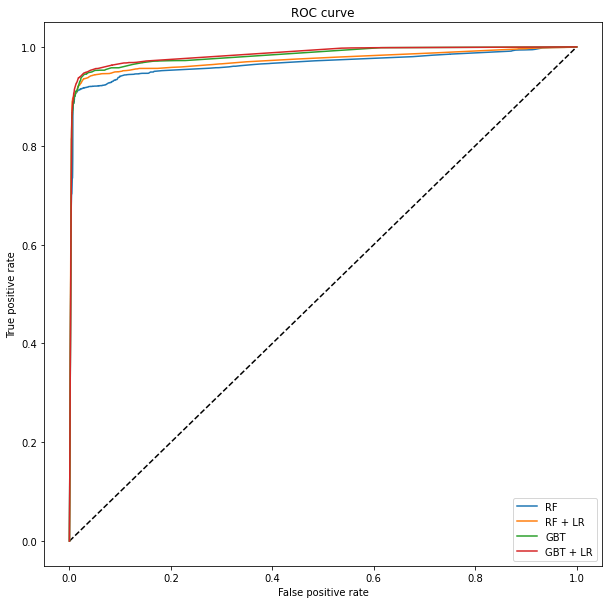

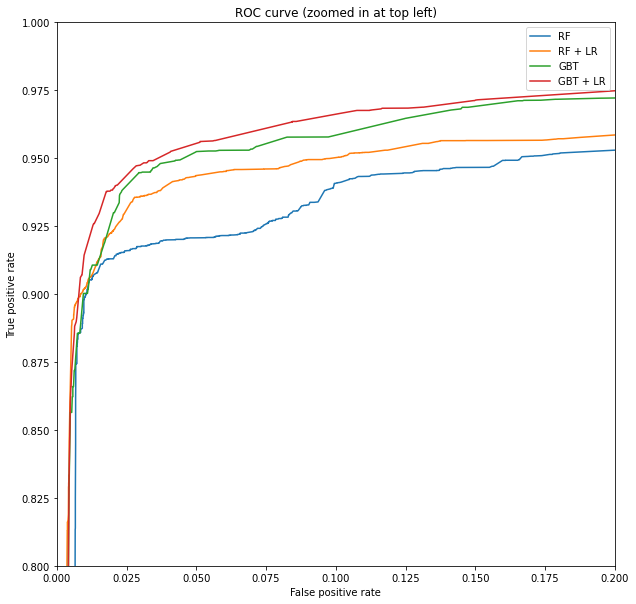

In [11]:
### https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.5)


# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression(max_iter=1000)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression(max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]),
           y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1, figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2, figsize=(10,10))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## Примеры данных которые нецелесообразноо отправлять в модель в сыром виде:

### IP адрес: 
xxx.xxx.xxx.xxx -> регион, провайдер

### Координаты атомов:
AlphaFold
https://yakovlev.me/para-slov-za-alphafold2/

"как вообще математически можно выразить структуру белка. До того мы постоянно неявно подразумевали, что это координаты атомов (всех, каркасных, Cα или каких-то ещё), но на практике это очень неудачное представление, поскольку оно не единственное. Мы обычно считаем, что предсказание работает как некоторая детерминированная функция: принимает на вход последовательность и всегда возвращает один единственный ответ. Но какой из бесконечного набора координат "канонический"?



"... инвариантом структуры является матрица (таблица) всех попарных расстояний между атомами. "



# Отбор признаков

В прошлых лекциях вы познакомились с тем, что такое признаки. Сегодня мы попытаемся научиться отделять полезные признаки от бесполезных, а также понижать размерность пространства признаков.

## Зачем отбирать признаки?


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_features.png" alt="alttext" width=760/>

*Во-первых*, признаков может быть слишком много, больше чем нужно. Это может возникнуть в ситуациях, когда используется вся имеющаяся на данный момент информация, потому что неизвестно, какая её часть может понадобиться, а какая — нет. В таких случаях можно повысить качество решения задачи, выбирая только действительно важные признаки. Существует другой подход: можно сформировать новые признаки на основе старых, таким образом признаков станет меньше, но их информативность сохранится.



*Во-вторых*, существуют признаки, из-за которых при решении задачи возникает много проблем. Это шумовые признаки — признаки, которые не связаны с целевой переменной и никак не относятся к решаемой задаче. К сожалению, не всегда можно понять по обучающей выборке, что в ней присутствуют такие признаки.
Полезно рассмотреть несколько примеров присутствия шумовых признаков в данных. Пусть в выборку добавляют 1000 признаков. Значения каждого признака генерируются из стандартного нормального распределения. Понятно, что эти признаки бесполезны, они никак не помогут решить задачу. Но, поскольку их много, может так оказаться (из соображений теории вероятностей), что один из них коррелирует с целевой переменной. При этом он будет коррелировать только на обучающей выборке, а на контрольной выборке корреляции наблюдаться не будет, поскольку признак абсолютно случайный. Однако внутри модели этот признак может быть учтён как важный и иметь какой-то вес. Получается, что модель зависит от признака, который никак не помогает решить задачу. Из-за этого качество модели и ее обобщающая способность окажутся ниже, чем хотелось бы. 

В более общем случае можно говорить, что в многоразмерном пространстве почти всегда можно найти корреляции. См. картинку.


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_correlations.png" alt="alttext" width=600/>


Больше подобных примеров можно найти на https://www.wnycstudios.org/podcasts/otm/articles/spurious-correlations.



*В-третьих*, перед нами может стоять задача ускорения модели. Дело в том, что чем больше признаков, тем более сложная модель получается, и тем больше времени необходимо, чтобы построить прогноз. Существуют задачи, в которых прогнозы нужно строить очень быстро, например, выдача рекомендаций товаров на сайте интернет-магазина. Пользователь что-то ищет, нажимает на ссылку в поисковой выдаче и переходит на страницу интересующего его товара. На этой странице есть поле, в котором показываются рекомендации к этому товару, например похожие товары, которые должна выдавать модель. Важно, чтобы она выдавала рекомендации очень быстро, страница не должна долго загружаться, чтобы пользователь не подумал, что с сайтом что-то не так, и не ушел к конкуренту. В этом случае необходимо, чтобы модель была очень быстрой, и один из подходов к ускорению модели — это отбор признаков, которых достаточно, чтобы прогнозы были хорошими.

## Полный перебор 

Можно попытаться перебрать все возможные комбинации признаков. Но даже 100  признаков такой подход будет считаться до конца Вселенной. 

Потому прибегают к эвристикам, которые, очевидно, могут пропускать оптимальное решение

## Одномерный отбор признаков

Самый простой подход к отбору признаков — это одномерный подход. В нём оценивается связь каждого признака с целевой переменной, например, измеряется корреляция. Такой подход — довольно простой, он не учитывает сложные закономерности, в нём все признаки считаются независимыми, тогда как в машинном обучении модели учитывают взаимное влияние признаков, их пар или даже более сложные действия на целевую переменную. 



### Формализация задачи
Пусть у нас есть N объектов с K признаками и для каждого объекта задана целевая переменная или ответ. Обозначим  матрицу объектов-признаков через $X \in \mathbf{R}^{N x M} $, а вектор ответов через Y. Для удобства введем следующие дополнительные обозначения:

* $\overline{X}_j$- среднее значение признака j по всей выборке
* $\overline{Y}$- среднее значение целевой переменной на всей выборке

Задача — оценить предсказательную силу (информативность) каждого признака, то есть насколько хорошо по данному признаку можно предсказывать целевую переменную. Данные оцененной информативности можно использовать, чтобы отобрать k лучших признаков или признаки, у которых значение информативности больше порога (например, некоторой квантили распределения информативности).



### Корреляция

Один из самых простых методов измерения связи между признаком и ответами — это корреляция. Корреля́ция (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин.

Коэффициент корреляции R определяется формулой:

$ R = \frac{\sum_{i=1}^{N} (X_{ij} - \overline{X}_j)(Y_{i} - \overline{Y})} {\sqrt{ \sum_{i=1}^{N}(X_{ij} - \overline{X}_j)^2\sum_{i=1}^{N} (Y_{i} - \overline{Y})^2}} $


Чем больше по модулю корреляция между признаком и целевой переменной, тем более информативным является данный признак. При этом она максимальна по модулю (Rj = ±1), если между признаком и целевой переменной есть **линейная связь**, то есть если целевую переменную можно строго линейно выразить через значение признака. Это означает, что корреляция измеряет только линейную информативность, то есть способность признака линейно предсказывать целевую переменную. Вообще говоря, корреляция рассчитана на вещественные признаки и вещественные ответы. Тем не менее, её можно использовать в случае, если признаки и ответы бинарные (имеет смысл кодировать бинарный признак с помощью значений ±1).


In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from scipy import stats

features = prepare_data(data)
X_train, X_test, y_train, y_test = train_test_split(features, data["Survived"], test_size=0.2, random_state=33)


correlations = []
for column in features:
  r , p_value = stats.pearsonr(X_train[column], y_train)
  correlations.append((column,r))

correlations.sort(key=lambda tup: abs(tup[1]),reverse=True)
for name, r in correlations:
  print(f'{name} : {r:.3f} ')
  

Sex=female : 0.537 
Sex=male : -0.537 
Pclass : -0.326 
sqrt_Fare : 0.324 
Cabin_char=n : -0.290 
Cabin_num : 0.205 
Embarked=C : 0.172 
Cabin_char=B : 0.156 
Embarked=S : -0.152 
Cabin_char=D : 0.148 
Cabin_char=E : 0.133 
Cabin_char=C : 0.106 
N_cabins : 0.086 
Parch : 0.082 
Cabin_char=F : 0.043 
Cabin_char=T : -0.029 
Age : -0.027 
Cabin_char=A : 0.027 
Embarked=Q : -0.009 
Cabin_char=G : -0.006 
SibSp : -0.006 


### AUC-ROC


Пусть решается задача бинарной классификации, и необходимо оценить важность признака j для решения именно этой задачи. В этом случае можно попробовать построить классификатор, который использует лишь этот один признак j, и оценить его качество. Например, можно рассмотреть очень простой классификатор, который берёт значение признака j на объекте, сравнивает его с порогом t, и если значение меньше этого порога, то он относит объект к первому классу, если же меньше порога — то к другому, нулевому или минус первому, в зависимости от того, как мы его обозначили. Далее, поскольку этот классификатор зависит от порога t, то его качество можно измерить с помощью таких метрик, как площадь под ROC-кривой или Precision-Recall кривой, а затем по данной площади отсортировать все признаки и выбирать лучшие.

In [13]:
from sklearn.metrics import roc_auc_score
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from scipy import stats

features = prepare_data(data)
X_train, X_test, y_train, y_test = train_test_split(features, data["Survived"], test_size=0.2, random_state=33)


rocs = []
for column in features:
  # use feature as score directly
  r1 = roc_auc_score(y_score=X_train[column], y_true=y_train) 
  # use feature as score in reversed manner
  r2 = roc_auc_score(y_score=-X_train[column], y_true=y_train)
   
  r = max(r1, r2)
  rocs.append((column,r))

rocs.sort(key=lambda tup: max(1 - tup[1], tup[1]),reverse=True)
for name, r in rocs:
  print(f'{name} : {r:.3f} ')
  

Sex=female : 0.764 
Sex=male : 0.764 
sqrt_Fare : 0.693 
Pclass : 0.676 
Cabin_char=n : 0.624 
Cabin_num : 0.624 
Embarked=S : 0.570 
Embarked=C : 0.569 
Parch : 0.562 
SibSp : 0.554 
Cabin_char=B : 0.536 
Cabin_char=D : 0.529 
Cabin_char=C : 0.527 
Cabin_char=E : 0.526 
N_cabins : 0.514 
Age : 0.506 
Cabin_char=F : 0.505 
Cabin_char=A : 0.503 
Embarked=Q : 0.503 
Cabin_char=T : 0.501 
Cabin_char=G : 0.500 







### Проблемы одномерного отбора признаков


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_multidim.png" alt="alttext" width=600/>


У подхода, при котором важности всех признаков оцениваются по отдельности, есть свои недостатки. На левом рисунке изображена двумерная выборка, для которой необходимо решить задачу классификации. Если спроецировать данную выборку на ось абсцисс, то она будет разделима, хотя и будут присутствовать ошибки. Если же спроецировать данную выборку на ось ординат, то все объекты разных классов перемешаются, и выборка будет неразделима. В этом случае при использовании любого метода одномерного оценивания информативности первый признак будет информативен, а второй — совершенно неинформативен. Тем не менее, видно, что если использовать эти признаки одновременно, то классы будут разделимы идеально. На самом деле, второй признак важен, но он важен только в совокупности с первым, и методы одномерного оценивания информативности не способны это определить. На рисунке справа показана выборка, на которой одномерные методы оценки информативности работают ещё хуже. В этом случае, если спроецировать выборку на ось абсцисс или ординат, то объекты классов перемешаются, и в обоих случаях данные будут совершенно неразделимы. И, согласно любому из описанных методов, оба признака неинформативны. Тем не менее, если использовать их одновременно, то, например, решающее дерево может идеально решить данную задачу классификации.

Пример: Влияние роста и веса при предсказании вероятности сердечного заболевания. Избыточный вес может являться важным фактором, но оценить является ли он избыточным или нормальным можно только зная рост пациента.

## Жадный отбор признаков


Жадные методы отбора признаков, по сути своей, являются надстройками над методами обучения моделей. Они перебирают различные подмножества признаков и выбирают то из них, которое дает наилучшее качество определённой модели машинного обучения.
Данный процесс устроен следующим образом. Обучение модели считается черным ящиком, который на вход принимает информацию о том, какие из его признаков можно использовать при обучении модели, обучает модель, и дальше каким-то методом оценивается качество такой модели, например, по отложенной выборке или кросс-валидации. Таким образом, задача, которую необходимо решить — это оптимизация функционала качества модели по подмножеству признаков.

### Полный перебор


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_graphic-full.png" alt="alttext" width=600/>


Самый простой способ решения данной задачи — это полный перебор всех подмножеств признаков и оценивание качества на каждом подмножестве. Итоговое подмножество — то, на котором качество модели наилучшее. Этот перебор можно структурировать и перебирать подмножества последовательно: сначала те, которые имеют мощность 1 (наборы из 1 признака), потом наборы мощности 2, и так далее. Это подход очень хороший, он найдет оптимальное подмножество признаков, но при этом очень сложный, поскольку всего таких подмножеств $2^d$, где d — число признаков. Если признаков много — сотни или тысячи, то такой перебор невозможен: он займет слишком много времени, возможно, сотни лет или больше. Поэтому такой метод подходит либо при небольшом количестве признаков, либо если известно, что информативных признаков очень мало, единицы.


### Жадное добавление


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_graphic-greedy.png" alt="alttext" width=600/>


Если же признаков много и известно, что многие из них информативны, то нужно применять жадную стратегию. Жадная стратегия используется всегда, когда полный перебор не подходит для решения задачи. Например, может оказаться неплохой стратегия жадного наращивания (жадного добавления). Сначала находится один признак, который дает наилучшее качество модели (наименьшую ошибку Q):

$i_1 = argmin Q(i)$. 

Тогда множество, состоящее из этого признака:

$J_1 = {i_1}$

Дальше к этому множеству добавляется еще один признак так, чтобы как можно сильнее уменьшить ошибку модели:

$i_2 =argminQ(i_1,i)$, $J_2 ={i_1,i_2}$.

Далее каждый раз добавляется по одному признаку, образуются множества J3 , J4 , . . . . Если в какой-то момент невозможно добавить новый признак так, чтобы уменьшить ошибку, процедура останавливается. Жадность процедуры заключается в том, что как только какой-то признак попадает в оптимальное множество, его нельзя оттуда удалить.




In [14]:
#https://scikit-learn.org/stable/modules/feature_selection.html
#https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py

#http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#example-5-sequential-feature-selection-for-regression
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector 
sfs = SequentialFeatureSelector(LogisticRegression(max_iter=1000),
                                k_features = 8,
                                cv=5)
sfs.fit(X_train,y_train)

df =pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.8391608391608392, 0.7272727272727273, 0.802...",0.785118,"(Sex=female,)",0.047054,0.0366096,0.0183048
2,"(2, 5)","[0.8391608391608392, 0.7342657342657343, 0.809...",0.787925,"(SibSp, Sex=female)",0.0452623,0.0352156,0.0176078
3,"(0, 2, 5)","[0.8531468531468531, 0.7342657342657343, 0.809...",0.794947,"(Pclass, SibSp, Sex=female)",0.0493426,0.0383902,0.0191951
4,"(0, 2, 5, 8)","[0.8531468531468531, 0.7482517482517482, 0.809...",0.797745,"(Pclass, SibSp, Sex=female, Embarked=Q)",0.0438815,0.0341413,0.0170707
5,"(0, 2, 5, 8, 15)","[0.8531468531468531, 0.7482517482517482, 0.809...",0.797745,"(Pclass, SibSp, Sex=female, Embarked=Q, Cabin_...",0.0438815,0.0341413,0.0170707
6,"(0, 2, 5, 8, 15, 17)","[0.8531468531468531, 0.7482517482517482, 0.809...",0.797745,"(Pclass, SibSp, Sex=female, Embarked=Q, Cabin_...",0.0438815,0.0341413,0.0170707
7,"(0, 2, 5, 6, 8, 15, 17)","[0.8531468531468531, 0.7482517482517482, 0.809...",0.797745,"(Pclass, SibSp, Sex=female, Sex=male, Embarked...",0.0438815,0.0341413,0.0170707
8,"(0, 2, 5, 6, 8, 15, 17, 18)","[0.8391608391608392, 0.7552447552447552, 0.809...",0.796346,"(Pclass, SibSp, Sex=female, Sex=male, Embarked...",0.0355306,0.027644,0.013822


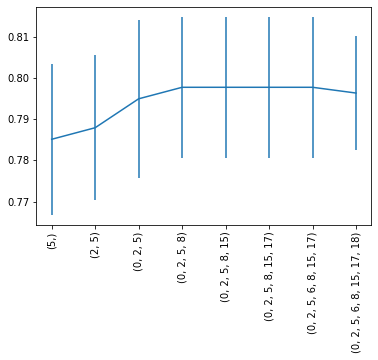

In [15]:
plt.errorbar(np.arange(1, 9),
             df['avg_score'], 
             yerr=df['std_err'])
plt.xticks(np.arange(1, 9), df["feature_idx"],  rotation=90)
plt.show()

### ADD-DEL


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_graphic-non-greedy.png" width=600/>


Описанный выше подход довольно быстрый: в нем столько итераций, сколько признаков в выборке. Но при этом он слишком жадный, перебирается слишком мало вариантов и мы можем оказаться в плохой локальной точке. Процедуру можно усложнить. Один из подходов к усложнению — это алгоритм ADD-DEL, который не только добавляет, но и удаляет признаки из оптимального множества. Алгоритм начинается с процедуры жадного добавления. Множество признаков наращивается до тех пор, пока получается уменьшить ошибку, затем признаки жадно удаляются из подмножества, то есть перебираются все возможные варианты удаления признака, оценивается ошибка и удаляется тот признак, который приводит к наибольшему уменьшению ошибки на выборке. Эта процедура повторяет добавление и удаление признаков до тех пор, пока уменьшается ошибка. Алгоритм ADD-DEL всё еще жадный, но при этом он менее жадный, чем предыдущий, поскольку *может исправлять ошибки*, сделанные в начале перебора: если вначале был добавлен неинформативный признак, то на этапе удаления от него можно избавиться.



<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_graphic-add-del.png" style="height: 470px;">




In [16]:
sffs = SequentialFeatureSelector(
           LogisticRegression(max_iter=1000),
           k_features = 8,
           forward=True, 
           floating=True, # use ADD-DEL
           verbose=0,
           scoring='accuracy',
           cv=5)

sffs.fit(X_train.values,y_train)
df = pd.DataFrame.from_dict(sffs.get_metric_dict()).T
df 

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.8391608391608392, 0.7272727272727273, 0.802...",0.785118,"(5,)",0.047054,0.0366096,0.0183048
2,"(2, 5)","[0.8391608391608392, 0.7342657342657343, 0.809...",0.787925,"(2, 5)",0.0452623,0.0352156,0.0176078
3,"(0, 2, 5)","[0.8531468531468531, 0.7342657342657343, 0.809...",0.794947,"(0, 2, 5)",0.0493426,0.0383902,0.0191951
4,"(0, 2, 5, 8)","[0.8531468531468531, 0.7482517482517482, 0.809...",0.797745,"(0, 2, 5, 8)",0.0438815,0.0341413,0.0170707
5,"(0, 2, 5, 8, 15)","[0.8531468531468531, 0.7482517482517482, 0.809...",0.797745,"(0, 2, 5, 8, 15)",0.0438815,0.0341413,0.0170707
6,"(0, 2, 5, 8, 15, 17)","[0.8531468531468531, 0.7482517482517482, 0.809...",0.797745,"(0, 2, 5, 8, 15, 17)",0.0438815,0.0341413,0.0170707
7,"(0, 2, 5, 6, 8, 15, 17)","[0.8531468531468531, 0.7482517482517482, 0.809...",0.797745,"(0, 2, 5, 6, 8, 15, 17)",0.0438815,0.0341413,0.0170707
8,"(0, 2, 5, 6, 8, 15, 17, 18)","[0.8391608391608392, 0.7552447552447552, 0.809...",0.796346,"(0, 2, 5, 6, 8, 15, 17, 18)",0.0355306,0.027644,0.013822


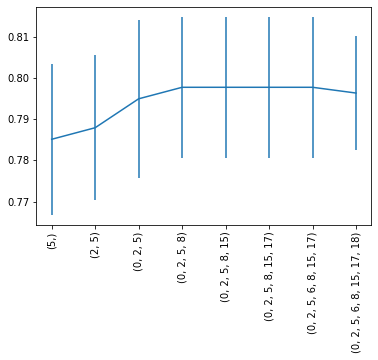

In [17]:
plt.errorbar(np.arange(1, 9),
             df['avg_score'], 
             yerr=df['std_err'])
plt.xticks(np.arange(1, 9), df["feature_idx"],  rotation=90)
plt.show()

## Отбор признаков на основе моделей

### Использование весов признаков

Во многих моделях (eg линейных) перед признаками стоят веса. Если признаки масштабированы, то веса при признаках можно интерпретировать как информативности: чем больше по модулю вес при признаке j, тем больший вклад этот признак вносит в ответ модели. Однако если признаки не масштабированы, то так использовать веса уже нельзя. Например, если есть два признака, и один по масштабу в 1000 раз меньше другого, то вес первого признака может быть очень большим, только чтобы признаки были одинаковыми по масштабу.
Если необходимо обнулить как можно больше весов, чтобы линейная модель учитывала только те признаки, которые наиболее важны для нее, можно использовать L1-регуляризацию. Чем больше коэффициент при L1-регуляризаторе, тем меньше признаков будет использовать линейная модель.

Рассмотрим это на примере Линейного классификатора который мы конструировали на 2-м занятии.

<img src ="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/
L04_skalyar.png" width="800">

In [18]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

for i, w in enumerate(lr.coef_[0]):
  print(X_train.columns[i],w)

Pclass -0.6349580358258843
Age -0.024030787205529938
SibSp -0.33556092611399796
Parch -0.14112516926602314
sqrt_Fare 0.16871462439748053
Sex=female 1.339364271470412
Sex=male -1.3291342188396127
Embarked=S -0.1242138229207906
Embarked=Q -0.2427373215852018
Embarked=C 0.23096354926639512
Cabin_num -0.0060450669430625985
N_cabins -0.2518413909507936
Cabin_char=D 0.3573696463904812
Cabin_char=C -0.34381421821120917
Cabin_char=A 0.01766835360528751
Cabin_char=T -0.31971502911406013
Cabin_char=G -0.6663541383923239
Cabin_char=F 0.5316588460563281
Cabin_char=E 0.7857183336021356
Cabin_char=B 0.14258109292470794
Cabin_char=n -0.49488283423030777


In [19]:
from sklearn.feature_selection import SelectFromModel

In [20]:
lr_selector = SelectFromModel(LogisticRegression(max_iter=1000))
lr_selector.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=1000, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [21]:
X_train.columns[lr_selector.get_support()]

Index(['Pclass', 'Sex=female', 'Sex=male', 'Cabin_char=G', 'Cabin_char=F',
       'Cabin_char=E', 'Cabin_char=n'],
      dtype='object')

In [22]:
lr_selector.transform(X_train) # select only relevant features 

array([[3., 0., 1., ..., 0., 0., 1.],
       [2., 1., 0., ..., 0., 0., 1.],
       [3., 0., 1., ..., 0., 0., 1.],
       ...,
       [2., 0., 1., ..., 0., 0., 1.],
       [3., 0., 1., ..., 0., 0., 1.],
       [2., 0., 1., ..., 0., 0., 1.]])

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf_selector  = SelectFromModel(rf)
rf_selector.fit(X_train, y_train)

X_train.columns[rf_selector.get_support()]

Index(['Pclass', 'Age', 'sqrt_Fare', 'Sex=female', 'Sex=male', 'Cabin_num'], dtype='object')

### Отбор признаков - это тоже выбор гиперпарметров

Никогда не отбирайте признаки на том же наборе данных, на котором тестируетесь. Иначе получите завышенное качество вашей модели

#### Пример обучения на большом числе бесполезных признаков

Сгенерируем следущий датасет. 

У нас есть по 500 пациентов, больных и здоровых. 
Для каждого известно 100000 **случайных** бинарных признаков. 
Что будет, если мы попросим нашу модель научиться отделять здоровых от больных?

In [63]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

pat_cnt = 500
snv_count = 100000
top_k = 10

genes = [f"SNP{ind}" for ind in range(snv_count)]
healthy = pd.DataFrame(np.random.choice([0,1], 
                                        size=(pat_cnt, snv_count)), 
                       columns=genes)
healthy['State'] = "H"
diseased = pd.DataFrame(np.random.choice([0,1], 
                      size=(pat_cnt, snv_count)),
                        columns=genes)
diseased['State'] = "D"

patients = pd.concat([healthy, diseased], axis=0)

X = patients.drop("State", axis=1)
Y = patients['State']

In [64]:
X.head()

,SNP0,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,SNP10,SNP11,SNP12,SNP13,SNP14,SNP15,SNP16,SNP17,SNP18,SNP19,SNP20,SNP21,SNP22,SNP23,SNP24,SNP25,SNP26,SNP27,SNP28,SNP29,SNP30,SNP31,SNP32,SNP33,SNP34,SNP35,SNP36,SNP37,SNP38,SNP39,...,SNP99960,SNP99961,SNP99962,SNP99963,SNP99964,SNP99965,SNP99966,SNP99967,SNP99968,SNP99969,SNP99970,SNP99971,SNP99972,SNP99973,SNP99974,SNP99975,SNP99976,SNP99977,SNP99978,SNP99979,SNP99980,SNP99981,SNP99982,SNP99983,SNP99984,SNP99985,SNP99986,SNP99987,SNP99988,SNP99989,SNP99990,SNP99991,SNP99992,SNP99993,SNP99994,SNP99995,SNP99996,SNP99997,SNP99998,SNP99999
0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,...,0,1,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,...,1,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1
3,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,...,0,0,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0
4,1,0,1,0,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,1,0,1,0,1


##### Без отбора признаков

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y == "D", 
                                                    test_size=0.3, 
                                                    random_state=777)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_train_pred = model.predict_proba(X_train)[:, 1]
train_rocauc = roc_auc_score(y_score=y_train_pred, y_true=y_train)
train_prauc = average_precision_score(y_score=y_train_pred, y_true=y_train)
train_accuracy = accuracy_score(y_pred=y_train_pred > 0.5, y_true=y_train)
print("Train quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

y_test_pred = model.predict_proba(X_test)[:, 1]
test_rocauc = roc_auc_score(y_score=y_test_pred, y_true=y_test)
test_prauc = average_precision_score(y_score=y_test_pred, y_true=y_test)
test_accuracy = accuracy_score(y_pred=y_test_pred > 0.5, y_true=y_test)
print("Test quality:")
print(f"ROCAUC : {test_rocauc:.02f}")
print(f"PRAUC : {test_prauc:.02f}")
print(f"Accuracy: accuracy {test_accuracy:.02f}")



Train quality:
ROCAUC : 1.00
PRAUC : 1.00
Accuracy: accuracy 1.00
Test quality:
ROCAUC : 0.46
PRAUC : 0.48
Accuracy: accuracy 0.48


Модель идеально выучила данные обучения, но с тестом беда (как и должно быть)

##### С неправильной процедурой отбора признаков

Возьмем те признаки, для которых средняя разница для больных и здоровых максимальна. Заметьте, мы даже не используем чего-то сильно сложного. 

In [67]:
diffs = X[Y == "H"].mean(axis=0) - X[Y == 'D'].mean(axis=0)
top = np.abs(diffs).sort_values(ascending=False)[0:top_k]
genes = top.index

X_selected = X[genes]

И посмотрим, на качество модели

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,
                                                    Y == "D", 
                                                    test_size=0.3,
                                                    random_state=777)

model = LogisticRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict_proba(X_train)[:, 1]
train_rocauc = roc_auc_score(y_score=y_train_pred, y_true=y_train)
train_prauc = average_precision_score(y_score=y_train_pred, y_true=y_train)
train_accuracy = accuracy_score(y_pred=y_train_pred > 0.5, y_true=y_train)
print("Train quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

y_test_pred = model.predict_proba(X_test)[:, 1]
train_rocauc = roc_auc_score(y_score=y_test_pred, y_true=y_test)
train_prauc = average_precision_score(y_score=y_test_pred, y_true=y_test)
train_accuracy = accuracy_score(y_pred=y_test_pred > 0.5, y_true=y_test)
print("Test quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

Train quality:
ROCAUC : 0.74
PRAUC : 0.73
Accuracy: accuracy 0.68
Test quality:
ROCAUC : 0.66
PRAUC : 0.68
Accuracy: accuracy 0.59


Внезапно, качество на тесте выглядит размным. Да, не очень классное, но есть. А должно быть соответствующее случайно модели - признаки-то случайные. 

Дело в том, что мы изначально выбрали те признаки, которые работали хорошо по слуучайным причинам на всем нашем искуственном датасете, а не на только на трейне. 

##### С правильной процедурой отбора признаков 




In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, 
                                                    Y == "D",
                                                    test_size=0.3,
                                                    random_state=777)
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, 
                                                          y_train, 
                                                          test_size=0.8, 
                                                          random_state=777)


Отбираем признаки на одном датасете

In [92]:
diffs = X_train1[np.logical_not(y_train1)].mean(axis=0) - X_train1[y_train1].mean(axis=0)
top = np.abs(diffs).sort_values(ascending=False)[0:top_k]
genes = top.index


Обучаем модель на втором

In [93]:
model = LogisticRegression()
model.fit(X_train2[genes], y_train2)
y_train_pred = model.predict_proba(X_train2)[:, 1]



Тестируем на третьем 

In [94]:
y_test_pred = model.predict_proba(X_test)[:, 1]
train_rocauc = roc_auc_score(y_score=y_test_pred, y_true=y_test)
train_prauc = average_precision_score(y_score=y_test_pred, y_true=y_test)
train_accuracy = accuracy_score(y_pred=y_test_pred > 0.5, y_true=y_test)
print("Test quality:")
print(f"ROCAUC : {train_rocauc:.02f}")
print(f"PRAUC : {train_prauc:.02f}")
print(f"Accuracy: accuracy {train_accuracy:.02f}")

Test quality:
ROCAUC : 0.48
PRAUC : 0.49
Accuracy: accuracy 0.48


## Задача понижении размерности


Часто мы хотим данные из пространство высокой размерности преобразовать в пространство более низкой, с сохранением одного или нескольких свойств, например:

Объекты реконструируются обратно почти без ошибки
расстояние между объектами сохраняется
Зачем это нужно? По многим причинам:

1. Многие алгоритмы показывают себя плохо на простанствах большой размерности в принципе (проклятье размерности).

2. Некоторые - просто будут значительно дольше работать, при этом качество их работы не изменится от уменьшения размерности.

3. Понижение размерности позволяет использовать память более эффективно и подавать модели на обучение за один раз больше объектов.

4. Помогает понижение размерности и избавится о шума, как мы обсудим дальше



## Manifold assumption 

Мы предполагаем, что наши данные на самом деле лежат в пространстве меньшем, чем пространство исходных признаков

![alt text](https://edunet.kea.su/repo/src/L14_Encoders/img/manifold1.png)



В большинстве случаев это действительно правда. Например, лица людей даже на фотографиях 300x300, очевидно, лежат в пространстве меньшей размерности, нежели 90000. Ведь не каждая матрица 300 на 300, заполненная какими-то значениями от 0 до 1, даст нам изображение человека

![alt text](https://edunet.kea.su/repo/src/L14_Encoders/img/manifold2.png)



## PCA (Метод главных компонент)




### Метод главных компонент (PCA)
Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Изобретён Карлом Пирсоном в 1901 году.

Существует несколько способов сформулировать задачу метода главных компонент:

* через максимизацию дисперсии;
* через аппроксимацию данных линейными многообразиями меньшей размерности;
* через приближение матрицы матрицы с рангом k;
* через построения для данной многомерной случайной величины ортогонального преобразования координат, в результате которого корреляции между отдельными координатами обратятся в нуль.



<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_lec-1.png" width=850/>


##### $\color{brown}{\text{*Метод главных компонент как способ проекции данных на гиперплоскость}}$ 

Пусть имеется выборка, изображенная на рисунке ниже, и её необходимо спроецировать на некоторую прямую. В этом случае прямая будет тем лучше, чем меньше будет ошибка проецирования суммы по всей выборке расстояний от объекта до его проекции на эту прямую. Чем меньше эти расстояния, тем лучше прямая приближает данные, тем меньше будет ошибка и тем больше информации сохраняется. В идеальном случае прямая должна проходить через все объекты выборки, но в рассматриваемой ситуации это невозможно.

В общем случае, когда признаков много, выборка проецируется на гиперплоскость. Из аналитической геометрии известно, что есть два способа задания гиперплоскости. Первый — с помощью вектора нормали, он использовался в линейных методах. Второй — с помощью направляющих векторов. Пусть в исходном пространстве размерности D строится гиперплоскость размерности D − 1, тогда, если выбрать на этой плоскости D линейно независимых векторов, то они будут однозначно задавать эту гиперплоскость. Если направляющие векторы составить в матрицу W, так что каждый столбец этой матрицы — это один направляющий вектор, то проекция точки $x_i$ на данную гиперплоскость будет вычисляться по формуле $ x_i ∗ W $. Тогда для того, чтобы уменьшить ошибку проецирования на гиперплоскость, необходимо минимизировать следующее выражение:

$ \sum_{i=1}^l \lVert x_i - x_i * W \rVert^2 \to \min_W $


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_lec-4.png" width=650/>



#### Максимизация дисперсии выборки после понижения размерности


Иной взгляд на метод главных компонент заключается в следующем: пусть имеется выборка, показанная на рисунке ниже, и требуется выбрать прямую, на которую можно будет эту выборку, максимизировав при этом дисперсию спроецированных данных. Синяя прямая лучше подходит для решения данной задачи, поскольку при проецировании на нее сохраняется наибольший разброс.
И действтительно, чем больше дисперсия выборки после проецирования на прямую, тем больше сохраняется информации. Для данного случая этот критерий хорошо подходит: дисперсия выборки после проецирования на синюю прямую будет гораздо больше, чем после проецирования на красную прямую.


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_lec-6.png" width=700/>





##### $\color{brown}{\text{*Вывод PCA }}$ 
Формально дисперсию выборки после проецирования можно записать следующим образом:

$ \sum_{j=1}^d w_{j}^T X^T X w_{j} \to \max_{W}$

Чем больше значение этой суммы, тем больше оказывается дисперсия выборки после проецирования на гиперплоскость, которая задается матрицей весов W. Таким образом, это выражение нужно максимизировать, чтобы сохранить как можно больше информации.


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_lec-8.png" width=480/>


Обратим внимание на то что выборка центрированна:

<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_covariation.png" >

### PCA Решение

#### Вывод решения

<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_lec-10.png" >


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_first_component_1.png" >
<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_first_component_2.png" >
<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_first_component_3.png" >




Ранее была описана формулировка задачи метода главных компонент, теперь необходимо её решить. Одна из постановок задачи метода главных компонент — это максимизация дисперсии:

$ 
\begin{cases} 
\sum_{j=1}^d w_{j}^T X^T X w_{j} \to \max_{W} \\ 
W^T W = I
\end{cases}
$


Второе условие здесь приведено для обеспечения единственности решения.

Это является задачей оптимизации. Можно попытаться найти ее решение. (Если вы не знакомы с математическим анализом и далее ничего не поймете, то ничего страшного).

В первой строке записана дисперсия после проецирования, а во второй — ограничение, обеспечивающее наличие единственного решения.

В методе главных компонент есть один нюанс: выражение, через которое записана дисперсия, будет означать именно дисперсию выборки только в том случае, если матрица объекты-признаки центрирована (среднее каждого признака равно нулю). Далее считается, что выборка центрирована, и среднее из каждого столбца в матрице объекты-признаки уже вычли.

Итак, чтобы разобраться, как устроено решение этой задачи, необходимо сначала рассмотреть простой частный случай: требуется найти ровно одну компоненту, на которую проецируется вся выборка, так, чтобы дисперсия после проецирования была максимальной:

$ 
\begin{cases} 
w_{1}^T X^T X w_{1} \to \max_{w_1} \\ 
w_1^T w_1 = 1
\end{cases}
$

Для решения подобных задач условной оптимизации необходимо выписать лагранжиан:

....

После преобразований получается следующее выражение:

$X^T X w_1 = \lambda w_1$

Из него следует, что $w_1$ — это собственный вектор матрицы $X^T X$, а число $ \lambda $ является собственным значением, соответствующим этому вектору. Домножим слева полученное выражение на $w_1^T$. так-как $w_1^T w_1 = 1$, то $ w_{1}^T X^T X w_{1} = \lambda $, что говорит нам о том, что дисперсия выборки после проецирования будет равна собственному значению, соответствующему выбранному собственному вектору.

Итак, в методе главных компонент первая компонента — это собственный вектор матрицы $X^T X$, который соответствует максимальному собственному значению этой матрицы. Стоит обратить внимание, что $X^T X$ — это матрица ковариации, то есть именно та матрица, которая характеризует дисперсию выборки.



<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_first_component_4.png" width=300/>

Визуально это выглядит следующим образом: есть облако точек (рисунок 3.8), и необходимо выбрать именно то направление, при проецировании на которое сохраняется как можно больше дисперсии. Это направление и будет задаваться первым собственным вектором матрицы ковариации.


Итог:


## $XX^{T} = \lambda W$


Пример вычисления PCA на Python:
https://cs231n.github.io/neural-networks-2/#datapre

#### Остаточная дисперсия и производные метрики

На практике хочется как-то измерять значимость каждой компоненты. Для этого существует понятие остаточной дисперсии (explained variance).


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_explained-variance.png" width=700/>



## Как выбирать число компонент

Скачаем датасет, на котором понижение размерности видно более явно. 

В данном датасете хранятся признаки (нам сейчас не важно, какие), характеризащию примерно 8000 клеток крови.  

In [25]:
!wget https://kodomo.fbb.msu.ru/FBB/year_20/scRNAseq_CITEseq.txt -O scRNAseq_CITEseq.txt

--2021-06-17 17:41:17--  https://kodomo.fbb.msu.ru/FBB/year_20/scRNAseq_CITEseq.txt
Resolving kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)... 93.180.63.127
Connecting to kodomo.fbb.msu.ru (kodomo.fbb.msu.ru)|93.180.63.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17128751 (16M) [text/plain]
Saving to: ‘scRNAseq_CITEseq.txt’

scRNAseq_CITEseq.tx 100%[===================>]  16.33M   917KB/s    in 18s     

2021-06-17 17:41:35 (955 KB/s) - ‘scRNAseq_CITEseq.txt’ saved [17128751/17128751]



In [26]:
scRNAseq = pd.read_csv('scRNAseq_CITEseq.txt',sep='\t')


X_scRNAseq = scRNAseq.iloc[:,0:(scRNAseq.shape[1]-1)]
Y_scRNAseq = scRNAseq.iloc[:,scRNAseq.shape[1]-1]

X_scRNAseq = np.log(X_scRNAseq + 1)

Подбирать число компонент можно по-разному



1. По доле объясняемой дисперсии. Часто берут минимальное число компонент, которое объясняет 95% дисперсии. Подход, очевидно, порочный (а почему не 90% или 99%), зато быстрый)



In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X_scRNAseq.shape[1])
pca.fit(X_scRNAseq)


PCA(copy=True, iterated_power='auto', n_components=976, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.explained_variance_ratio_[0:10] # доля объясненной дисперсии для каждой компоненты

array([0.5878904 , 0.08634838, 0.03232831, 0.02364945, 0.01439433,
       0.01178928, 0.00566664, 0.0053071 , 0.00342483, 0.00276527])

434


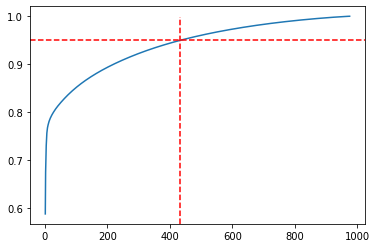

In [29]:
ths = 0.95
total_explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, total_explained.shape[0] + 1), total_explained)
plt.axhline(xmin=0, xmax=1000, y=ths, c="red", ls="--")
chosen_number = np.where(total_explained >= 0.95)[0][0]
plt.axvline(x=chosen_number, ymin=0, ymax=ths, c="red", ls="--")
print(chosen_number)

plt.show()

Набрали 434!!! компоненты. На самом деле - не очень хорошая ситуация. К ней привел именно жесткий порог, поставленный бездумно

2. Построить график на основе изменения доли дисперсии, сохраняемой при понижении размерности, при добавлении еще одной компоненты. И на основе графика выбрать нужное число компонент. Строить график можно по-разному. В ДЗ  будет один способ, сейчас бегло глянем другой, обычно все они дают похожие результаты. 

Можем, например, построить график, обратный построенному в прошлом примере - для каждой компоненты строим долю дисперсии, которую мы не объясним, если возьмем компонены до i, ввключая 

Записать это можно через собственные значения: 

$$E_m = \dfrac {\lambda_{m+1}+ ... +  \lambda_{n}} {\lambda_{1}+ ... +  \lambda_{n}}$$

Далее мы действуем по "критерию крутого склона" ("критерий локтя") - хотим найти такой m, что $E_{m} >> E_{m+1}$

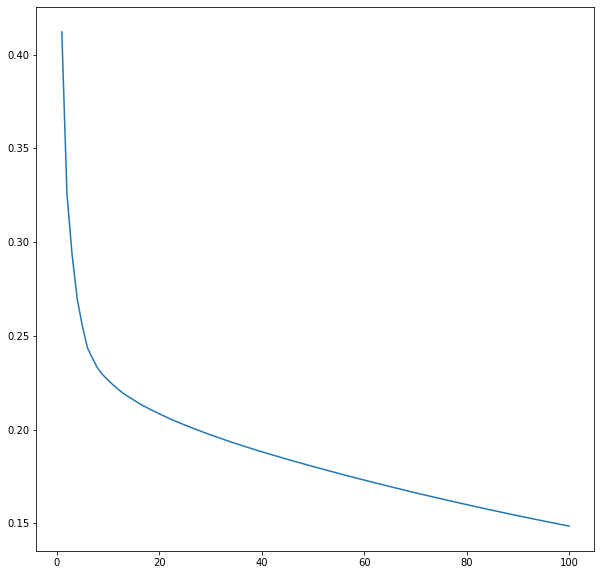

In [30]:
n_comp = 100


total_explained = 1 - np.cumsum(pca.explained_variance_ratio_)
total_explained = total_explained[:n_comp]

plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, n_comp + 1), total_explained)

plt.show()

Оптимальное число компонент - где-то в районе 10. 

В идеальном случае график буудет выглядеть как-то так. Но практически..(

![alttext](https://kodomo.fbb.msu.ru/FBB/year_20/chose_components.png)

3. Пермутационный:

 1) Перемешиваем значения каждого признака.

 2)  Получаем матрицу признаков, которая не содержит никакой информации о манифолде

 3) Делаем PCA

 4) Любая explained variance - просто из-за природы данных

 5) Делаем так 100-1000 раз

 6) Пусть на реальных данных k-я компонента объясняет
n% дисперсии.

 7) Смотрим на распределение доли дисперсии,
объясняемой k-компонентой для случайных данных
(полученных перемешиванием).

 8) Можем сравнить и принять решение, объясняет ли k-я
компонента что-то реальное, или просто шум

In [31]:
import os
import tqdm


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
import pandas as pd

from scipy.stats import norm
from sklearn.decomposition import PCA

def get_variance_by_chance(dataset, n_replics, n_components):
    variance_explained_by_chance = np.zeros((n_replics, n_components))
    for i in tqdm.tqdm_notebook(range(n_replics)):
        if i % 100 == 0:
            print(f"{i} iter")
        random_data = dataset.copy().apply(np.random.permutation, axis=0)
        random_pca = PCA(n_components=n_components)
        random_pca.fit(random_data)
        variance_explained_by_chance[i, :] = random_pca.explained_variance_ratio_
    return variance_explained_by_chance

def get_pc_variance(dataset, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(dataset)
    return pca.explained_variance_ratio_

def plot_mean_and_CI(ax, values, label, ci_level=0.95, alpha_transparency=0.5, color_mean=None, color_shading=None):
    mean = values.mean(axis=0)
    
    std = values.std(axis=0)
    n = values.shape[1]
    se = std / np.sqrt(n) 
    
    q_alpha = (1-ci_level) / 2
    ci_num = np.abs(norm.ppf(q_alpha, loc=0, scale=1))
    
    lb = mean -  ci_num * se
    ub = mean + ci_num * se
    
    # plot the shaded range of the confidence intervals
    ax.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=alpha_transparency)
    # plot the mean on top
    ax.plot(mean, c=color_mean, lw=3, label=label)
    
def plot_explained_variance(ax, variance):
    ax.plot(variance, label='real', lw=3)
    ax.scatter(np.arange(0, variance.shape[0]), variance)
    
def plot_variance_by_change(ax, variance_by_chance):
    plot_mean_and_CI(ax, variance_by_chance, label='chance', color_mean='red', color_shading='red')

def calc_permutat_pval(real_values, permut_values, eps=None):
    eps = eps or (1/(permut_values.shape[0] * 10))
    
    p_values = np.zeros_like(real_values)
    for i in range(0, p_values.shape[0], 1):
        p_values[i] = (permut_values[:, i] >= real_values[i]).mean() + eps
    return p_values

def plot_explained_vs_chance(ax, explained_variance, variance_by_chance, dataset_name):
    plot_explained_variance(ax, explained_variance)
    plot_variance_by_change(ax, variance_by_chance)

    ax.set_title(f'PCA {dataset_name}', size=35)
    ax.set_xlabel("Component number", size=25)
    ax.set_ylabel("Explained variance ration", size=25)
    ax.set_xticks(np.arange(0, explained_variance.shape[0], 5))
    ax.set_xticklabels(np.arange(1, explained_variance.shape[0]+1, 5), size=20)

    ax.tick_params(labelsize=20, size=10)
    ax.set_ylim(0, explained_variance[0] + 0.1 )
    ax.legend(fontsize=20)

def plot_pval_plot(ax, p_values, dataset_name, alpha_level = 0.05, logscale=True):
    if logscale:
        p_values = -np.log10(p_values)
        alpha_level = -np.log10(alpha_level)

    
    ax.set_title(f"PC significance, {dataset_name}", size=35)
    ax.plot(p_values, lw=3)
    ax.scatter(np.arange(0, p_values.shape[0]), p_values, lw=3)

    ax.set_xlabel("Component number", size=25)
    ax.set_ylabel("-log(pvalue + eps)", size=25)
    ax.set_xticks(np.arange(0, p_values.shape[0], 5))
    ax.set_xticklabels(labels = np.arange(1, p_values.shape[0]+1, 5), size=20)
    ax.tick_params(labelsize=20, size=10)
    

    ax.hlines(y=alpha_level, xmin=0, xmax=100, color="red", linestyles="dashed", lw=3)
    
    
def pca_analysis(ax1, ax2, dataset, title ,  transpose, n_replics = 1000, n_components = 100):

    if transpose:
        dataset = dataset.transpose()
    explained_variance = get_pc_variance(dataset, n_components)
    variance_by_chance = get_variance_by_chance(dataset, n_replics, n_components)
    p_values = calc_permutat_pval(explained_variance, variance_by_chance)
    plot_explained_vs_chance(ax1, explained_variance, variance_by_chance, title)
    plot_pval_plot(ax2, p_values, title)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


0 iter



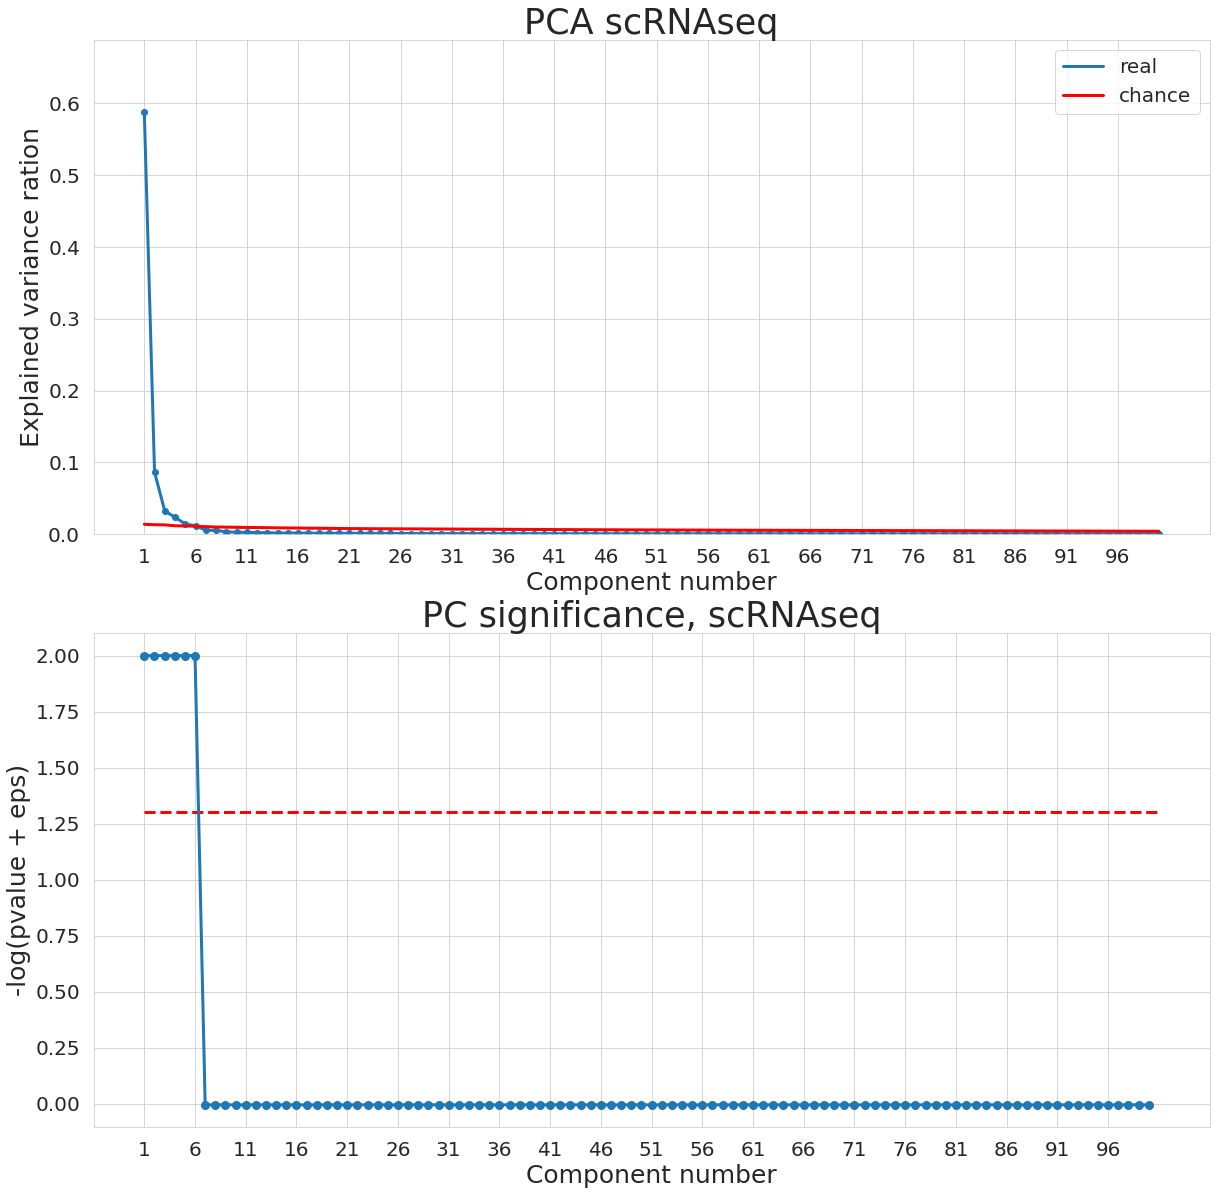

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1)
f.set_figheight(20)
f.set_figwidth(20)
pca_analysis(ax1, ax2, X_scRNAseq, "scRNAseq", transpose=False, n_replics=10)

Здесь меетод нам явно говорит, что ооптимальное число компоонт - 6. Остальные объясняют дисперсии не больше, чем объясняют соответствующие им компоненты, построенные для полностью случайных данных. 



### Практика: Ковариационные матрицы

Итак, давайте для начала подробнее познакомимся с понятием ковариционной матрицы.

<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_gaussian_probability.png" width=600/>


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_covariance_matrix.png" width=600/>




In [33]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import sklearn as sklearn
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

In [34]:
# function for plotting principal components
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

# function for vector plotting
def plot_components_vector(ax, data, vector, color, label="", delta=0.5):
    limits_x = [np.min(data[:,0])-delta, np.max(data[:,0])+delta]
    limits_y = [np.min(data[:,1])-delta, np.max(data[:,1])+delta]
    
    if np.fabs(vector[1]) > 1e-5:
        if np.fabs(vector[0]) > 1e-5:
            x = np.arange(*limits_x, 0.1)
            y = x * vector[1]/vector[0]
        else:
            y = np.arange(*limits_y, 0.1)
            x = np.full_like(y, 0)
    else:
        x = np.arange(*limits_x, 0.1)
        y = np.full_like(x, 0)
        
    ax.plot(x, y, color=color, label=label)
    # ax.set_xlim(*limits_x)
    # ax.set_ylim(*limits_y)

Для того, чтобы семлировать многоразмерное нормальное распределение, можно использовать функцию

```python
np.random.multivariate_normal(mu, covariance_matrix, size=500)
```

* mu - вектор средних значений (центр колокола);
* covariance_matrix - матрица ковариации;
* size - размер семлированной выборки.

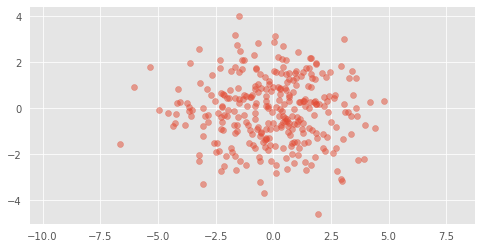

In [35]:
# let's sample data from multivariate normal distribution with covaraince matrix C 


fig, ax = plt.subplots(1, 1 , figsize = (8, 4))

mu = np.zeros(2)
C_simple = np.array([[4,0],
                     [0,2]])

data_simple = np.random.multivariate_normal(mu, C_simple, size=300)
ax.scatter(data_simple[:,0], data_simple[:,1], alpha=0.5)
plt.axis('equal')
plt.show()

Как мы видим, данные распределены в соответствии с двумерным распределением. А так как значения матрицы ковариации вне диагонали равны нулю, то корреляции между переменными нет, поэтому график не повернут.

Давайте попробуем его повернуть. Для этого нам необходимо найти ковариационную матрицу с ненулевыми значениями вне диагонали.

Так как матрица $ X^T X $ всегда положительно полуопределена (то есть собственные значения) > 0 (в самом деле $ w^T X^T X w = (Xw)^T Xw \ge 0$) и симметрична (является эрмитовой), то необходимо просто подобрать подходящий X. 
Пусть это будет $ X = \begin{pmatrix} 1 & 1 \\ 0 & 3 \end{pmatrix}$. Тогда:
$X^T X = \begin{pmatrix} 1 & 1 \\ 0 & 3 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 1 & 3 \end{pmatrix} = \begin{pmatrix} 2 & 3 \\ 3 & 9 \end{pmatrix}$.

Сгененрируем данные с такой ковариационной матрицей:

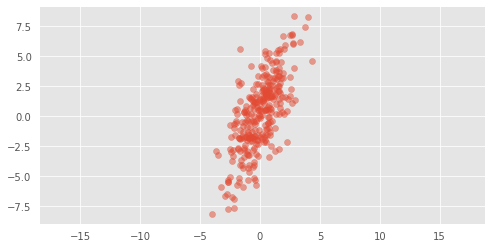

In [36]:
fig, ax = plt.subplots(1, 1 , figsize = (8, 4))

mu = np.zeros(2)

C_angle = np.array([[2, 3], 
              [3, 9]])
#C_angle = np.array([[9, 3], 
#              [3, 2]])   

'''C_angle = np.array([[3, 3], 
                    [3, 6]])'''

data_angle = np.random.multivariate_normal(mu, C_angle, size=300)
ax.scatter(data_angle[:,0], data_angle[:,1], alpha=0.5)
plt.axis('equal')
plt.show()

Как мы знаем, теоретические истинные главные компоненты равны собственным векторам ковариационной матрицы. Давайте построим на наших графиках собственные вектора ковариационной матрицы и компоненты, которые нам выдаст в качестве своего ответа алгоритм PCA из библиотеки sklearn.

Для поиска собственных значений можно использовать функцию  
```python
np.linalg.eig(C)
```

См. https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

Для PCA разложения функцию 
```python
sklearn.decomposition.PCA
```

**Внимание! Attention! Achtung!** 
* np.linalg.eig возвращает вторым значением матрицу собственных векторов, в которой собственные вектора расположены по столбцам, т.е. v\[:, i\] есть собственный вектор соответсвующий i-му собственному значению.
* В то же время в поле класса PCA PCA.components_ лежат вектора главных компонент, которые располагаются там построчно (n_components, n_features)

In [37]:
import scipy
eigen_values_simple, eigen_vectors_simple = np.linalg.eig(C_simple)
eigen_values_angle, eigen_vectors_angle = np.linalg.eig(C_angle)

eigen_vectors_simple = eigen_vectors_simple.T
eigen_vectors_angle = eigen_vectors_angle.T

In [38]:
eigen_values_simple

array([4., 2.])

In [39]:
eigen_values_angle

array([ 0.89022777, 10.10977223])

In [40]:
# PCA
pca_simple = sklearn.decomposition.PCA()
pca_simple.fit(data_simple)

pca_angle = sklearn.decomposition.PCA()
pca_angle.fit(data_angle)

# Let's compare it
print('simple PCA components:\n', pca_simple.components_)
print('simple true components:\n', eigen_vectors_simple)
print('*' * 80)
print('angle PCA components:\n', pca_angle.components_)
print('angle true components:\n', eigen_vectors_angle)


simple PCA components:
 [[-0.99948737  0.03201563]
 [-0.03201563 -0.99948737]]
simple true components:
 [[1. 0.]
 [0. 1.]]
********************************************************************************
angle PCA components:
 [[-0.3416248  -0.93983642]
 [-0.93983642  0.3416248 ]]
angle true components:
 [[-0.93788501  0.34694625]
 [-0.34694625 -0.93788501]]


Обратите внимание, что PCA упорядочивает собственные вектора. Это значит что собственный вектор соответствующий главной компоненте соответственно имеющей максимальную дисперсию будет находиться в первой строке. Этим объясняется разница вот втором случае.

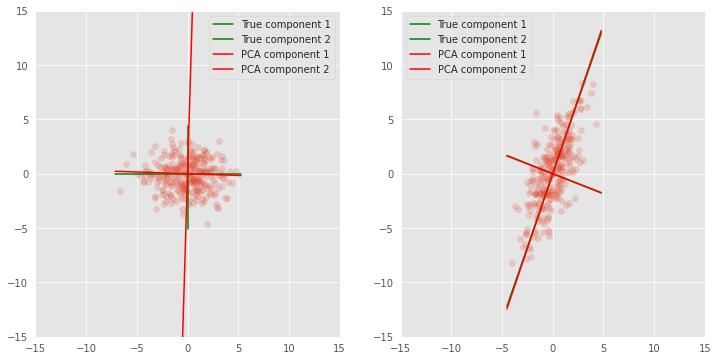

In [41]:
# plot it
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize = (12, 6))

ax1.scatter(data_simple[:,0], data_simple[:,1], alpha=0.2)
plot_components_vector(ax1, data_simple, eigen_vectors_simple[0], 'g', 'True component 1')
plot_components_vector(ax1, data_simple, eigen_vectors_simple[1], 'g', 'True component 2')

plot_components_vector(ax1, data_simple, pca_simple.components_[0], 'r', 'PCA component 1')
plot_components_vector(ax1, data_simple, pca_simple.components_[1], 'r', 'PCA component 2')

s=15; ax1.set(xlim=(-s, s), ylim=(-s, s))
ax1.legend()

ax2.scatter(data_angle[:,0], data_angle[:,1], alpha=0.2)
plot_components_vector(ax2, data_angle, eigen_vectors_angle[0], 'g', 'True component 1')
plot_components_vector(ax2, data_angle, eigen_vectors_angle[1], 'g', 'True component 2')

plot_components_vector(ax2, data_angle, pca_angle.components_[0], 'r', 'PCA component 1')
plot_components_vector(ax2, data_angle, pca_angle.components_[1], 'r', 'PCA component 2')
ax2.legend()
s=15; ax2.set(xlim=(-s, s), ylim=(-s, s))
plt.show()

Как вы видите зеленые компоненты (истинные главные компоненты) полученные разложением ковариационной матрицы на собственные вектора отличаются от красных компонент, которые были полученны вычислением PCA на данных. Это неудивительно, ибо данные были сгенерированы статистически. Если вы будете увеличивать размер сгенерированной выборки, то со временем разрешения экрана станет недостаточно для отображения разницы между PCA и реальными компонентами.

### Практика: explained variance ratio

В модуле PCA, после fit можно получить explained variance ratio посредством обращения к полю explained_variance_ratio_, а explined_variance посредством обращения к полю explained_variance_. 

Давайте на практике убедимся, что explained_variance соответсвует собственным значениям, а explained_variance_ratio соответствует долям соответствующих собственных значений от общей суммы собственных значений.

Для этого сгенерируем диагональную матрицу $ \Lambda $ с элементами на диагонале равными 1,2, 3, ... N и произвольную ортогональную матрицу $Q$. Введем новую матрицу $ A = Q \Lambda Q^T $. Можно доказать, что эта матрица симметрична и положительно определена, т.е. она является матрицей ковариаций. Сгенерируем данные по ней, применим к ней PCA разложение и посмотрим на explained_variance.

In [42]:
from scipy.stats import ortho_group

dims = 5
Q = ortho_group.rvs(dims)
# check ortogonality
print(np.dot(Q, Q.T).round(8))

eig_vals = np.arange(1.0, dims + 1)
EV = np.diag(eig_vals)
# covariance matrix
CM = np.linalg.multi_dot([Q, EV, Q.T])
print(CM)

# check eigenvalues
print(np.linalg.eigvals(CM))

[[ 1. -0. -0.  0. -0.]
 [-0.  1.  0.  0.  0.]
 [-0.  0.  1.  0. -0.]
 [ 0.  0.  0.  1.  0.]
 [-0.  0. -0.  0.  1.]]
[[ 1.83653427  0.22805211 -0.24269311 -1.24744228  0.28187697]
 [ 0.22805211  3.47098496  0.4917196  -0.93195385 -0.81210863]
 [-0.24269311  0.4917196   2.8536939  -0.54737819  0.43694641]
 [-1.24744228 -0.93195385 -0.54737819  3.47102652 -0.12702199]
 [ 0.28187697 -0.81210863  0.43694641 -0.12702199  3.36776035]]
[1. 5. 4. 3. 2.]


In [43]:
data = np.random.multivariate_normal(np.zeros(dims), CM, size=50000)

pca = sklearn.decomposition.PCA()
pca.fit(data)
print('explained_variance_', np.sort(pca.explained_variance_).round(3))
print('eigen_values       ', eig_vals)
print('explained_variance_ratio_', np.sort(pca.explained_variance_ratio_).round(3))
print('eig_vals / sum(eig_vals) ', np.sort(eig_vals/np.sum(eig_vals)).round(3))

explained_variance_ [1.    2.012 2.983 4.021 5.015]
eigen_values        [1. 2. 3. 4. 5.]
explained_variance_ratio_ [0.067 0.134 0.198 0.268 0.334]
eig_vals / sum(eig_vals)  [0.067 0.133 0.2   0.267 0.333]


### Пример с Титаником

Что бы понять как использовать PCA на практике найдем главные компоненты для датасета Titanic и посмотрим на какое распредилится между ними дисперсия.



[0.14055536 0.12537319 0.11898577 0.10560394 0.09618154 0.09390492
 0.09148952 0.08427921 0.0751994  0.06842715]


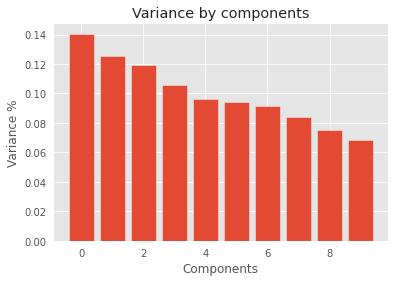

In [44]:
titanic_pca = sklearn.decomposition.PCA()
titanic_pca.fit(X_train)
print(titanic_pca.explained_variance_ratio_)
#plt.bar(range(titanic_pca.explained_variance_.shape[0]),titanic_pca.explained_variance_)

plt.bar(range(titanic_pca.explained_variance_ratio_.shape[0]),titanic_pca.explained_variance_ratio_)
plt.title('Variance by components')
plt.xlabel('Components')
plt.ylabel('Variance %')
plt.show()

Как видно из графика большая часть дисперсии приходится на первые две компоненты. Можно предположить что остальные могут быть отброшенны без особого ушерба для точности модели.

In [45]:
for i in range(1, 11):
  first_eigenvectors = titanic_pca.components_[:i]
  X_train_reduced = np.dot(X_train, first_eigenvectors.T)
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train_reduced,y_train)

  X_test_reduced = np.dot(X_test, first_eigenvectors.T)
  print(model.score(X_test_reduced,y_test))


0.7066666666666667
0.7266666666666667
0.7133333333333334
0.7
0.7
0.7066666666666667
0.72
0.7266666666666667
0.7266666666666667
0.7133333333333334


Однако в данном случае это не так. Во-первых потому что значительная часть данных бинарные. 

Во-вторых - вероятно присутствует одна из проблем, которые мы рассмотрим ниже.


Обратите внимание, что с какого-то момента качество предсказания вообще не меняется

### Пример с лицами

Рассмотрим как PCA применялся для решения практической задачи: распознавания лиц*.

Датасет:
[Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)


* Сейчас для этого используются более эффективные алгоритмы использующие CNN.

Загрузим датасет и распакуем его на диск VM Colab

In [46]:
# http://conradsanderson.id.au/lfwcrop/ (LFWcrop Face Dataset, greyscale version)
!wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip

import matplotlib.pyplot as plt
import numpy as np
import os

dir='lfwcrop_grey/faces'

# http://conradsanderson.id.au/lfwcrop/ (LFWcrop Face Dataset, greyscale version)
!wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
!unzip lfwcrop_grey.zip


Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: lfwcrop_grey/faces/Kaisser_Bazan_0001.pgm  
  inflating: lfwcrop_grey/faces/Tony_Blair_0113.pgm  
  inflating: lfwcrop_grey/faces/Paul_Coppin_0001.pgm  
  inflating: lfwcrop_grey/faces/Herta_Daeubler-Gmelin_0002.pgm  
  inflating: lfwcrop_grey/faces/Richard_Myers_0009.pgm  
  inflating: lfwcrop_grey/faces/Kaye_Young_0001.pgm  
  inflating: lfwcrop_grey/faces/Juan_Ignacio_Chela_0002.pgm  
  inflating: lfwcrop_grey/faces/Paul_Wollnough_0001.pgm  
  inflating: lfwcrop_grey/faces/Carolina_Moraes_0002.pgm  
  inflating: lfwcrop_grey/faces/Charles_Taylor_0007.pgm  
  inflating: lfwcrop_grey/faces/George_W_Bush_0006.pgm  
  inflating: lfwcrop_grey/faces/Ian_Gillan_0001.pgm  
  inflating: lfwcrop_grey/faces/Shaun_Pollock_0001.pgm  
  inflating: lfwcrop_grey/faces/Junichiro_Koizumi_0022.pgm  
  inflating: lfwcrop_grey/faces/Steve_Mariucci_0002.pgm  
  inflating: lfwcrop_grey/faces/George_W_Bush_0214.pgm  
  inflati

(64, 64)


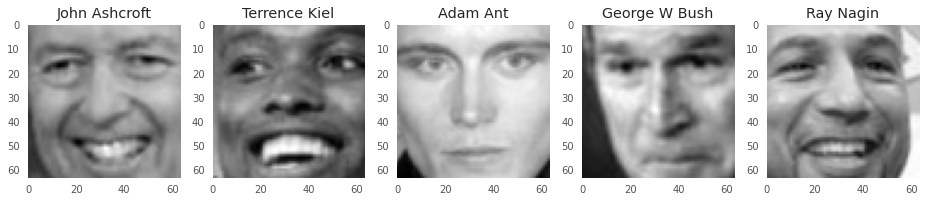

In [47]:
plt.rcParams['axes.grid'] = False
def show_faces(images, titles, h=64, w=64):
    plt.figure(figsize=(16 , 4))
    for i in range(min(images.shape[0],5)):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        

# Get first 1000 files
celebrity_photos=os.listdir(dir)[1:1001]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
# Load iages from disk
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
# Extract real celebrity name from file name
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]
print(images[0].shape)
show_faces(images, celebrity_names)

Предобработка данных:
Преобразуем изображения в вектора и центрируем их

(1000, 4096)


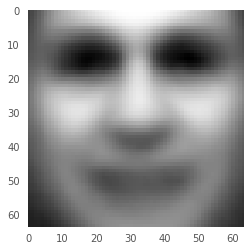

In [48]:
# Stretch to vector
X = images.reshape(images.shape[0], 64*64)
print(X.shape)
mean = np.mean(X, axis=0)
# Center: substract mean
centered_faces = X-mean
plt.imshow(mean.reshape(64, 64), cmap=plt.cm.gray )

Найдем собственные вектора. Аналогия с фотороботом.

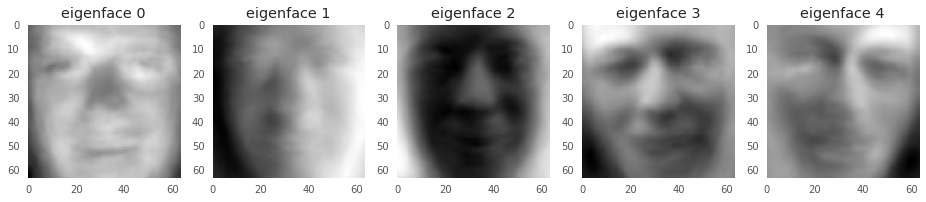

In [49]:
import sklearn
from sklearn.decomposition import PCA
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#n_components == min(n_samples, n_features)

pca_faces = sklearn.decomposition.PCA() #1000x4096

pca_faces.fit(centered_faces)
eigenfaces = pca_faces.components_
reshaped_eigenfaces = eigenfaces.reshape((1000, 64, 64))
eigenface_titles = ["eigenface %d" % i for i in range(reshaped_eigenfaces.shape[0])]
show_faces(reshaped_eigenfaces, eigenface_titles)


Восстановим лица с использованием n < 4096 компонент

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


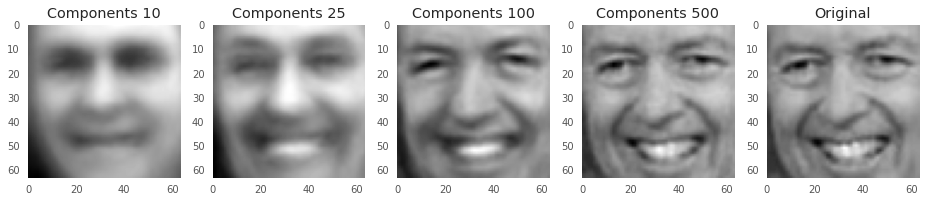

In [50]:
def create_embedding(img, n_components):
  # Generate embedding for first image using only 10 first components
  img = img.reshape(64*64) - mean
  emb = np.dot(img,eigenfaces[:n_components].T) #(1,4096) * (4096,1) 
  #print(emb,emb.shape) # 10 - 500 numbers only!

  # Recover image from embeding
  recovered_img = np.dot(emb,eigenfaces[:n_components]) 
  recovered_img += mean #shift by mean
  return emb, recovered_img

# Shome images recovered from embeddings of various sizes 
original_image = images[0]
titles = []
img_list = []
for n in [10,25,100,500]:
  embedding, recovered = create_embedding(original_image, n)
  img_list.append(recovered)
  titles.append(f"Components {n}")
img_list.append(original_image)
titles.append("Original")

show_faces(np.array(img_list), titles)

Распознавание лиц.
Теперь сравнивая вектора признаки в пространстве размерности 300 или 500 можно построить систему распознавания лиц.



### Практика: проблемы с PCA

Рассмотрим случай выборки, которая сгенерирована из двух вытянутых нормальных распределений, чьи основные оси неортогональны друг другу:

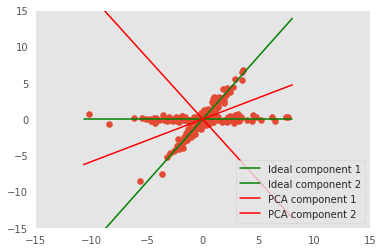

In [51]:
C1 = np.array([[10,0],[0,0.1]])
# rotate second normal distrbution by 60 degrees
phi = np.pi/3
rotation = np.array([[np.cos(phi), np.sin(phi)],
                     [-np.sin(phi),np.cos(phi)]])

data_1 = np.random.multivariate_normal(mu, C1, size=100)
data_2 = np.dot(data_1, rotation)
# generate data from two not orthogonal distributions
data = np.vstack([data_1,
                  data_2])

fig, ax = plt.subplots(1)
# ax.axis('equal')
# ax.set_aspect('equal', 'box')
ax.scatter(data[:,0], data[:,1])

# plot real axis

plot_components_vector(ax, data, np.array([1, 0]), color="green", label="Ideal component 1")
plot_components_vector(ax, data, [np.cos(phi), np.sin(phi)], color="green", label="Ideal component 2")

# plot PCA
model = PCA(n_components=2)
model.fit(data)
W_pca = model.components_

plot_components_vector(ax, data, W_pca[0], color="red", label="PCA component 1")
plot_components_vector(ax, data, W_pca[1], color="red", label="PCA component 2")
s = C1[0, 0] * 1.5
ax.set(xlim=(-s, s), ylim=(-s, s))
# ax.set_aspect('equal', 'box')
plt.legend()
plt.draw()

### Практика: еще одна проблема с PCA
Интересное направление в данных не совпадает с направлением максимальной дисперсии.

В примере ниже дисперсии не отражают интересующих нас направлений в данных:

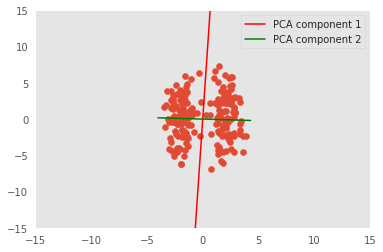

In [52]:
C = np.array([[0.5,0],[0,10]])
mu1 = np.array([-2,0])
mu2 = np.array([2,0])

data = np.vstack([np.random.multivariate_normal(mu1, C, size=100),
                  np.random.multivariate_normal(mu2, C, size=100)])

fig, ax = plt.subplots(1)

ax.scatter(data[:,0], data[:,1])
# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)

plot_components_vector(ax, data, model.components_[0], color="red", label="PCA component 1")
plot_components_vector(ax, data, model.components_[1], color="green", label="PCA component 2")

s = 15; ax.set(xlim=(-s, s), ylim=(-s, s))
ax.legend()
plt.show()

Очевидно, что в данном случае метод главных компонент будет считать вертикальную компоненту более значимой для описания набора данных, чем горизонтальную. 

Но, например, в случае, когда данные из левого и правого кластера относятся к разным классам, для их линейной разделимости вертикальная компонента является шумовой. Несмотря на это, её метод главных компонент никогда шумовой не признает, и есть вероятность, что отбор признаков с его помощью выкинет из ваших данных значимые для решаемой вами задачи компоненты просто потому, что вдоль них значения имеют низкую дисперсию.

Справляться с такими ситуациями могут некоторые другие методы уменьшения размерности данных, например, метод независимых компонент (Independent Component Analysis, ICA).

### Недостатки линейного PCA

Как мы увидели в предыдущих примерах, обычный PCA далеко не всегда работает хорошо. В частности, могут быть ситуации, когда построенная PCA проекция не дает хорошего разбиения объектов на группы. Для набора картинок с написанными от руки цифрами  MNIST, PCA даст такой результат:

Также бывают ситуации, когда оптимально спроецировать не на некоторую плоскость, а на многообразие (кривая плосоксть), как показано на картинке ниже.

<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/S-manifold.png" width=600/>


В данном случае оптимально спроецировать на S-образную кривую. 

В связи с вышеописанными случаями, ниже мы рассмотрим более сильные методы.

## Kernel PCA Ядровой (нелинейный) метод главных компонент

Как уже упомяналось, иногда невозможно захватить всю информацию линейной проекцией, хотя кривая поверхность с такой же размерностью это позволяет сделать. Одним из подходов к решению данной проблемы является задача перевода признаков в нелинейное пространство. 

### Kernel trick


Kernel Trick избегает явного отображения, которое нужно для получения линейного обучающего алгоритма для нелинейной функции или границы решений. Для всех $\mathbf{x} \ и \ \mathbf{{x}'} $ во входном пространстве $ \mathcal {X} $ некоторые функции $ k(\mathbf {x} ,\mathbf {x'}) \colon   \mathcal {X} \times \mathcal {X}\to \mathbb {R}$ )  могут быть представлены как скалярное произведение в другом пространстве $ \mathcal  {V} $. 
То есть, $ k(\mathbf {x} ,\mathbf {x'}) = < \phi(\mathbf{x}), \phi(\mathbf{x'})>$, где $ \phi \colon {\mathcal {X}}\to {\mathcal {V}} $, некоторая функция перевода функций из одного пространства в другое.


Функцию $k(\mathbf {x} ,\mathbf {x'})$ часто называют *ядром или ядерной функцией (kernel, kernel function)*, а пространство V - *спрямляющим пространством*.



Картинка с проекцией в более высокоразмерное пространство. 

После этого мы можем использовать обычный линейный PCA, но в высокоразмерном пространстве.

В новом более высокоразмерном пространстве нам не нужно делать никаких вычислений (нужно вычислять только скалярные произведения).

https://www.youtube.com/watch?v=HbDHohXPLnU&ab_channel=caltech


Пример с разделением MNIST
Пример с разделением radial kernel

PCA довольно чувствителен к выбору ядра.

К примеру, для данных, расположенных на трех окружностях:

<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_PCA-3-circles.png" width=260/>


в зависимости от выбора ядра мы будем получать совершенно разные отображение в спрямляющее пространство:


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_PCA-kernels.png" width=600/>


Упомянуть про размерности

Типы ядер:
Картинка из ESL (p 549)
Гауссово (см видео)

* $k(x_i, x_j) = \frac{1}{z} e^{-\frac{h(x_i, x_j)^2}{h}}$ - радиальная базисная функция RBF
* $k(x_i, x_j) = (<x_i, x_j> + c)^d, с, d \in \mathbb{R}$ - полиномиальное ядро
* $k(x_i, x_j) = \sigma((x_i, x_j>)$ - ядро с функцией активации

Интуиция: точки, лежащие рядом друг с другом в исходном пространстве, должны иметь большие скалярные произведения
(картинка с Гауссианой).


В целом, нелинейные методы требуют больше данных как более гибкие алгоритмы. Поэтому лучше начинать с линейных и переходить к нелинейным только тогда, когда они действительно необходимы.

Примеры
https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html


## Другие методы

Существуют и другие, более сильные методы понижения размерности в данных. К примеру, t-SNE и UMAP. 

Они решают немного иначе поставленную задачу - из измерения новой размерности мы не должны легко переходить в староое измерение. Взамен этого требуется, чтобы сохранялись расстояния между объектами. Причем, особое внимание уделяется близким расстояниям. Далекие же могут не сохраняться.


## tSNE (t-distributed stochastic neighbor embedding)


Идея состоит не в том что бы напрямую максимизировать дисперсиию, а найти такое пространство в котором расстояние между объектами будет сохраняться или по крайне мерее не сильно менятся.


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_manifold.jpg" >


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_t-SNE.png" >


http://datareview.info/article/algoritm-t-sne-illyustrirovannyiy-vvodnyiy-kurs/

 При уменьшении размерности набора данных, если использовать гауссово распределение для точек данных и точек отображения, мы получим дисбаланс в распределении расстояний для соседей точек. Это объясняется тем, что распределение расстояний существенно отличается для пространства большой размерности и для пространства малой размерности.

Уменьшим размерность нашего "клеточного" набора данных. И покрасим по разметке, которая нам известна из эксперимента. Видим, что разделение очень хорошее

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8617 samples in 0.012s...
[t-SNE] Computed neighbors for 8617 samples in 0.533s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8617
[t-SNE] Computed conditional probabilities for sample 2000 / 8617
[t-SNE] Computed conditional probabilities for sample 3000 / 8617
[t-SNE] Computed conditional probabilities for sample 4000 / 8617
[t-SNE] Computed conditional probabilities for sample 5000 / 8617
[t-SNE] Computed conditional probabilities for sample 6000 / 8617
[t-SNE] Computed conditional probabilities for sample 7000 / 8617
[t-SNE] Computed conditional probabilities for sample 8000 / 8617
[t-SNE] Computed conditional probabilities for sample 8617 / 8617
[t-SNE] Mean sigma: 0.336888
[t-SNE] Computed conditional probabilities in 0.592s
[t-SNE] Iteration 50: error = 72.8117752, gradient norm = 0.0026449 (50 iterations in 5.636s)
[t-SNE] Iteration 100: error = 72.3520203, gradient norm = 0.0009637 (50 iterations in 5

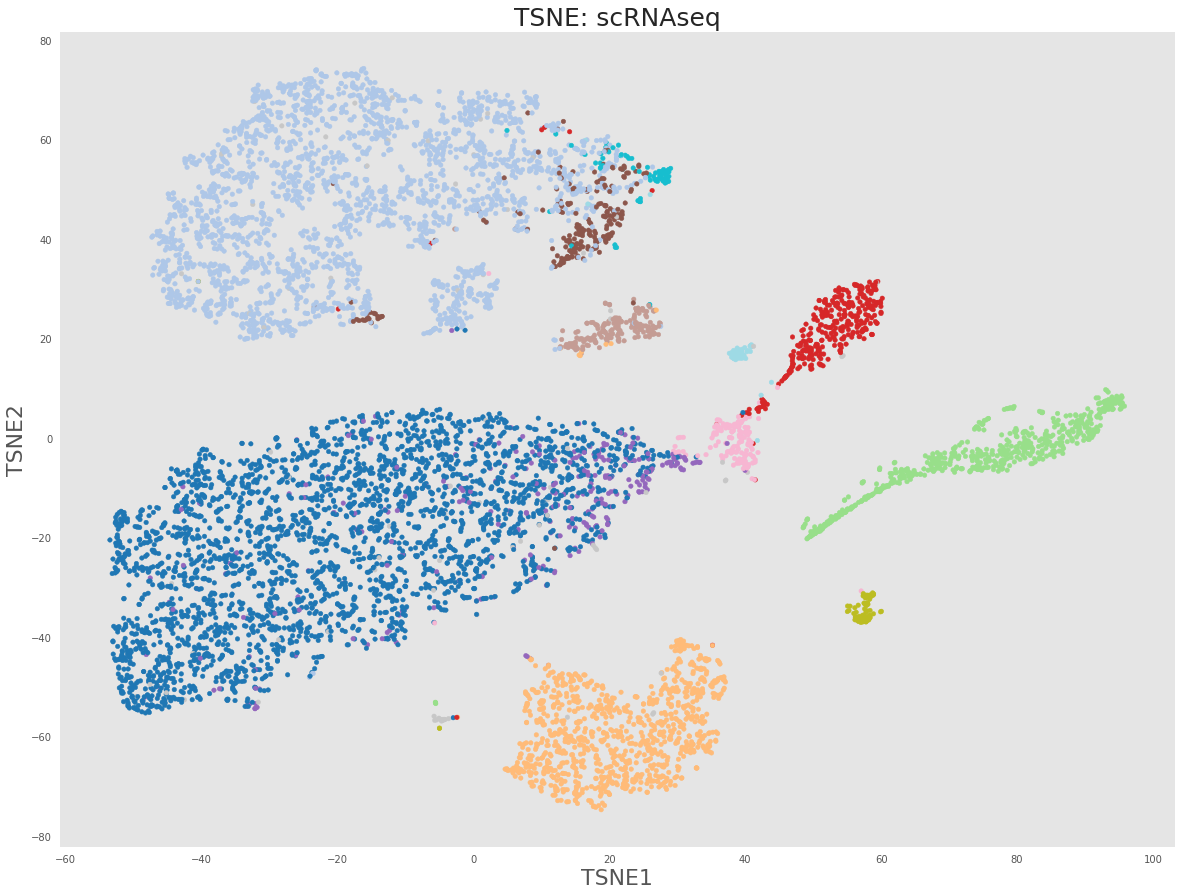

In [53]:
import sklearn 
import sklearn.manifold

X_reduced = PCA(n_components = 6).fit_transform(X_scRNAseq)
model = sklearn.manifold.TSNE(n_components = 2, 
             init = X_reduced[:, 0:2], # часто в качестве разумного приближения используют 
             perplexity=40, # важны параметр
             verbose = 2)

manifold = model.fit_transform(X_reduced)

plt.figure(figsize = (20,15))
plt.scatter(manifold[:, 0], manifold[:, 1], c = Y_scRNAseq, cmap = 'tab20', s = 20)
plt.title('TSNE: scRNAseq', fontsize = 25); 
plt.xlabel("TSNE1", fontsize = 22); plt.ylabel("TSNE2", fontsize = 22)
plt.show()

У t-SNE, как и разбираемого далее UMAP есть несколько проблем:

 1. Расстояния между кластерами точек могут ничего не значить (плохо сохраняются далекие расстояния)
 2. Размеры кластеров ничего не значат
 3. В шуме могут находиться "структуры" - особенно если гиперпараметр perplexity маленький. По-умолчанию его значение равно 40 и менять его надо аккуратно. Отвечает он и за то, насколько сильно учитываются дальние расстояния. Однако проблему из пункта 1 не решают даже большие значение perplexity.

Кроме perplexity важно варьировать и то, какое расстояние считается между объектами. По-умолчанию считаеется евклидово, которое не всегда дает лучший результат


Из-за первых двух недостатков результат tSNE НЕЛЬЗЯ использовать для кластеризации. 

Подробнее - https://distill.pub/2016/misread-tsne/

## UMAP
UMAP — uniform manifold approximation and projection
https://www.youtube.com/watch?v=94ZMJ8tq1Wk
https://umap-learn.readthedocs.io/en/latest/how_umap_works.html

 
Картинки с примерами разделений плоскости на PCA, t-SNE, UMAP


<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/L04_MNIST.jpg" >


Похож на tSNE, но работает в разы быстрее, а также предоставляет дополнительные возможности. Например, может проецировать точки из новых датасетов на уже имеющееся разложение, чего tSNE сделать не может

Кроме того, его можно использовать для понижения размерности не только до 2-3 (в целях визуализации), но и для больших размерностей, с которыми потом работать другими методами (хотя здесь надо быть аккуратным, он тоже склоннен деформировать дальние расстояния)


In [54]:
import warnings
warnings.filterwarnings("ignore")

from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 9).fit_transform(X_scRNAseq)
model = UMAP(n_components = 2, 
             min_dist = 1, 
             n_neighbors = 93,
             init = X_reduced[:, 0:2], 
             # много где, не только он, рекомендуют использовать для инициализации UMAP и tSNE первые две компоненты PCA
             n_epochs = 1000, 
             verbose = 2)
umap = model.fit_transform(X_reduced)

plt.figure(figsize = (20,15))
plt.scatter(umap[:, 0], umap[:, 1], c = Y_scRNAseq, cmap = 'tab20', s = 20)
plt.title('UMAP: scRNAseq', fontsize = 25); 
plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)
plt.show()

ModuleNotFoundError: ignored

Рекомендуется варьировать n_neighbours - отвечает за то же, что отвечало perplexity в tSNE, и min_dist, которое влияет на различимость точек внутри кластеров

Кроме этого, для UMAP важно варьировать и то, какое расстояние считается между объектами. По-умолчанию считаеется евклидово, которое не всегда дает лучший результат

### t-SNE vs UMAP

Скорость наше все - можно перебрать значительно бОльшее число гиперпараметров. 



<img src="http://edunet.kea.su/repo/src/L04_Feature_Engineering/img/UMAP-TSNE-performance.png" width=450/>



Более подробно: https://umap-learn.readthedocs.io/en/latest/performance.html

In [ ]:
from sklearn import manifold, datasets
from matplotlib import offsetbox

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


In [ ]:
# t-SNE embedding of the digits dataset
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "t-SNE embedding of the digits")

In [ ]:
import umap

umap = umap.UMAP(n_neighbors=5)
X_umap = umap.fit_transform(X) # преобразовываем
plot_embedding(X_umap, "UMAP embedding of the digits")

## Визуализация

Оба метода применяются в основном не для предобработки данных, а для визуализации.

In [ ]:
# Примеры

from torch.utils.tensorboard import SummaryWriter
import numpy
import torchvision

mnist = torchvision.datasets.MNIST('mnist', train = False, download = True)
print(mnist.data.shape)


In [ ]:
# Вспомогательный метод для запуска Tensorboard в Colab

# Fix https://stackoverflow.com/questions/60730544/tensorboard-colab-tensorflow-api-v1-io-gfile-has-no-attribute-get-filesystem
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

import os
import torch
# Запуск Tensorboard в Colab
def reinit_tensorboard(clear_log = True):
  # Лог-файлы читаются из этого каталога: 
  logs_base_dir = "runs"
  if clear_log:
    # Очистка логов
    !rm -rfv {logs_base_dir}/*
    os.makedirs(logs_base_dir, exist_ok=True)
  # Магия Colab
  %load_ext tensorboard
  %tensorboard --logdir {logs_base_dir}

#, metadata=mnist.targets
reinit_tensorboard()
mnist_chunk = mnist.data[:1000]
writer = SummaryWriter(comment = "mnist")
writer.add_embedding(torch.reshape(mnist_chunk,(-1,28*28)),mnist.targets[:1000])
writer.close()